

# **Engineering Statistics and Probability**
## **Computer Assignment 5**
---

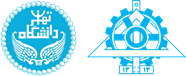

[**School of Electrical and Computer Engineering**, **College of Engineering**, **University of Tehran**](https://ece.ut.ac.ir/)

**Instructors:** Dr. Bahrak, Dr. Vahhabi

**Designers:** [Artin Tavassoli](mailto:artin.tavassoli2@gmail.com), [Mohammad Erfan Danaee](mailto:medanaee@gmail.com)

## **Topic:** Sum of Random Variables, Conditional Distribution, Covariance, and Functions of Two Random Variables

### **Submission Date:**

---

### ℹ️ Student information
+ First name: MohammadMahdi
+ Last Name: Jadidi
+ SID: 810103382

---

### We will use the following R packages:

*   [`dplyr`](https://cran.r-project.org/web/packages/dplyr/vignettes/dplyr.html): A popular and easy-to-use package for data manipulation in R. (for Qestion 2)
*   [`ggplot2`](https://ggplot2.tidyverse.org/): A powerful package for creating visualizations in R.
*   [`magrittr`](https://magrittr.tidyverse.org) : An package that introduces the pipe operator (%>%) to make code more readable by chaining

+ ⚠️ **Remove comment lines on first run.**


In [1]:
# install.packages("magrittr")
# install.packages("dplyr")
# install.packages("ggplot2")
library(magrittr)
library(dplyr)
library(ggplot2)
set.seed(42)
options(repr.plot.width = 15, repr.plot.height = 6)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




# Question 1 (25 points🎯)
## Sum of RVs and function of two RVs ⭐

A company wants to obtain a distribution of the loss it will incur at the end of the upcoming week.

Suppose a company is losing money due to product returns. The number of products of type `a` and `b` returned to the company each day is exponentially distributed and independent of each other, and the company loses 1\$ for each product returned.
Let $X_i$ number of products of type `a` and $Y_i$ number of products of type `b` be returned on day i.

 $$X_i , Y_i \sim Exp(λ = 0.01)$$

### 0. Complete the following two functions to plot the histogram and PDF of the data. (5 points🎯)

+ Note: You can use `geom_density` to plot the PDF.

In [3]:
plot_hist <- function(data, bins = 30, fill_color = "skyblue", line_color = "white") {
  # TO DO
  ggplot(data.frame(x = data), aes(x = x)) +
  geom_histogram(bins = bins, fill = fill_color, color = line_color) +
  theme_minimal() +
  labs(title = "Histogram", x = "Value", y = "Frequency")
}

plot_pdf <- function(data, line_color = "blue", fill_color = "lightblue", alpha = 0.5) {
  # TO DO
  ggplot(data.frame(x = data), aes(x = x)) +
  geom_density(color = line_color, fill = fill_color, alpha = alpha) +
  theme_minimal() +
  labs(title = "Probability Density Function", x = "Value", y = "Density")
}

### 1. Write down the company's loss due to the return of product A after one week. Let's assume this value is equal to $D$. (1 points🎯)

### 2. By generating 100,000 samples of the loss each day caused by product a, obtain 100,000 samples of the $D$. Then plot its PDF and histogram. (2 points🎯)



Xi∼Exp(λ=0.01)

D= i=range(1,7)∑Xi

🔴 **TO DO**

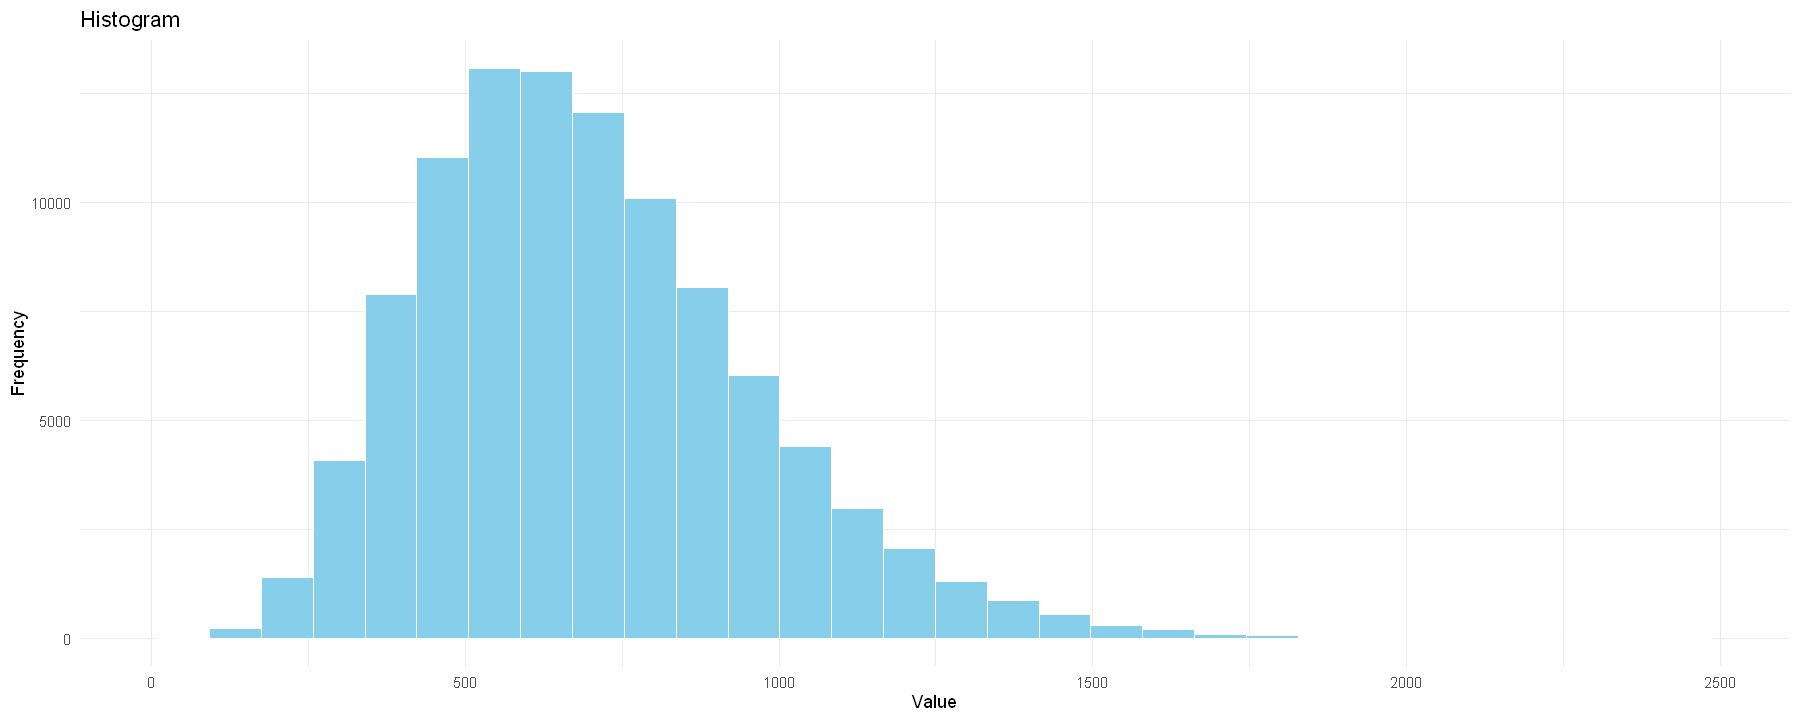

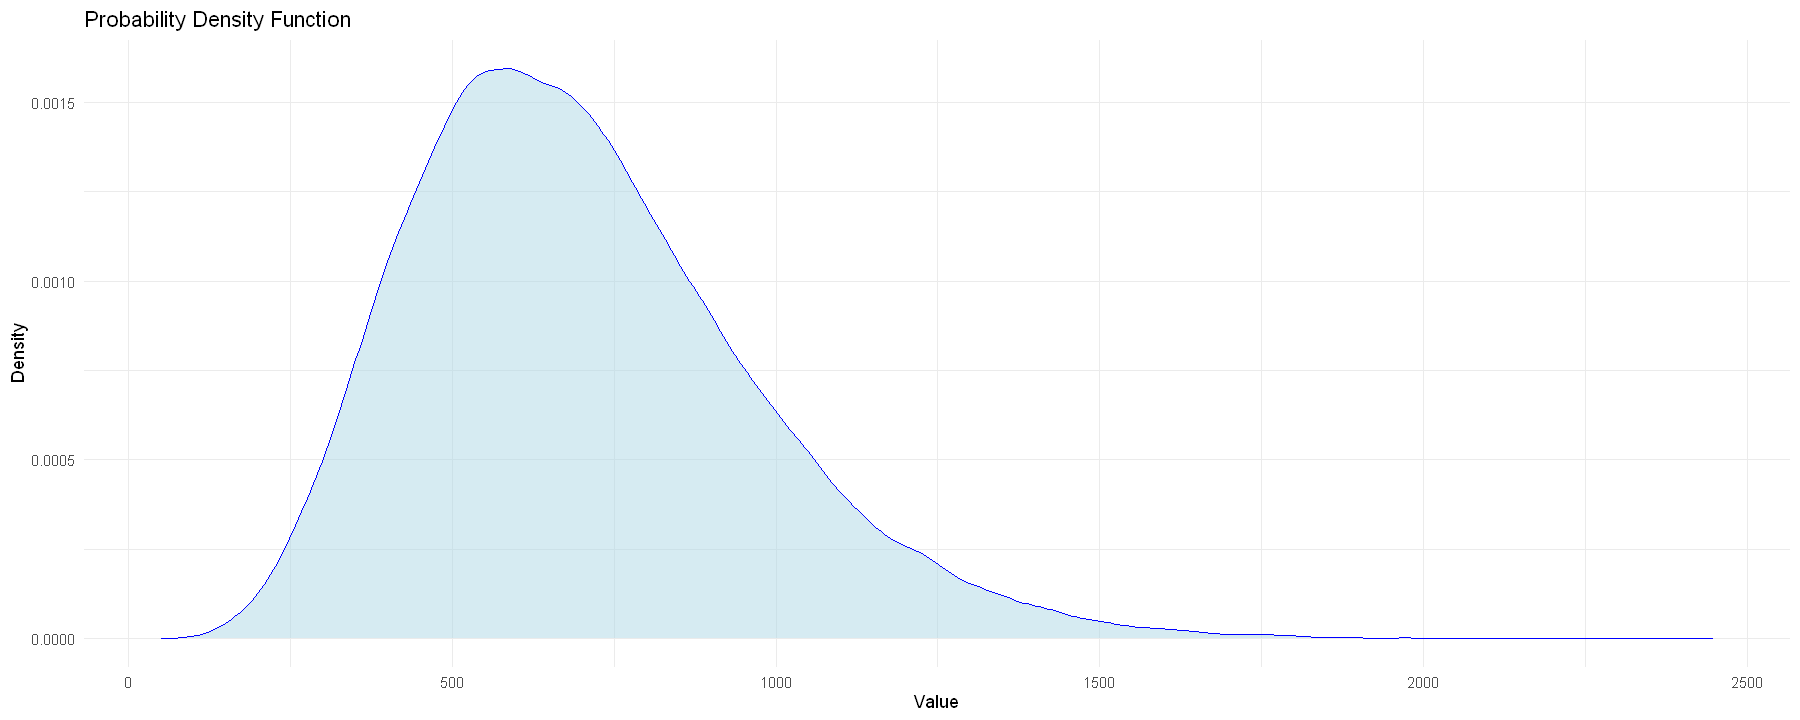

In [4]:
# TO DO
n_samples <- 100000
lambda <- 0.01
n_days <- 7
set.seed(42)
daily_losses <- matrix(
  rexp(n_samples * n_days, rate = lambda),
  nrow = n_samples, ncol = n_days
)
D <- rowSums(daily_losses)
plot_hist(D)
plot_pdf(D)


### 3. Calculate the mean and variance of the resulting distribution. (1 points🎯)

In [5]:
# TO DO
mean_D <- mean(D)
var_D  <- var(D)
cat("Mean of D:", mean_D, "\n")
cat("Variance of D:", var_D, "\n")


Mean of D: 699.8786 
Variance of D: 70239.77 


The total loss of the company after `n` days is the sum of `n` identical and independent exponential variables.
This sum has a distribution called the [**gamma distribution**](https://en.wikipedia.org/wiki/Gamma_distribution)

### 4. By studying this distribution, obtain the gamma distribution parameters for D and plot it's PDF. (2 points🎯)

shape = 7

rate = 0.01.

🔴 **TO DO**

In [6]:
plot_pdf_theory <- function(x, y,
                    line_color = "blue",
                    line_size = 1,
                    title = "Plot",
                    xlab = "x",
                    ylab = "y") {
  ggplot(data.frame(x, y), aes(x, y)) +
    geom_line(color = line_color, size = line_size) +
    theme_minimal() +
    labs(title = title, x = xlab, y = ylab)
}

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


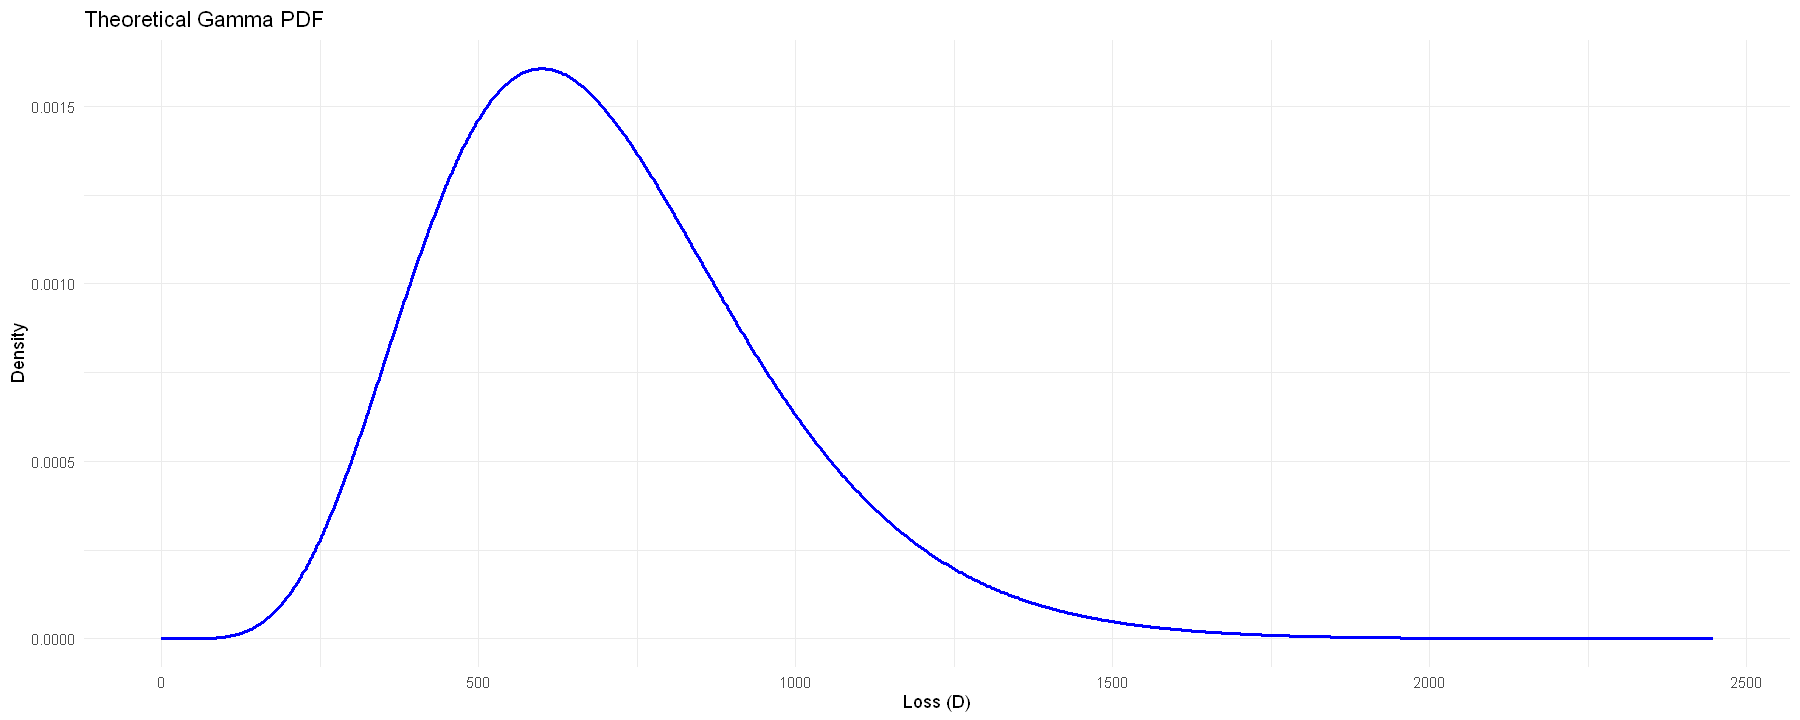

In [7]:
# TO DO
shape_param <- n_days
rate_param  <- lambda
x_vals <- seq(0, max(D), length.out = 1000)
y_vals <- dgamma(x_vals, shape = shape_param, rate = rate_param)
plot_pdf_theory(
  x_vals, y_vals,
  title = "Theoretical Gamma PDF",
  xlab  = "Loss (D)",
  ylab  = "Density"
)


### 5. Calculate the mean and variance theoretically and compare with section 3. (1 points🎯)

🔴 **TO DO**

shape_param/rate_param=700

shape_param/(rate_param^2)=70000

Now suppose the company wants to know what percentage of the company's loss after 7 days is related to product a.

### 6. Write down this ratio. plot 100,000 samples of this ratio by generating random samples of the company's losses. Also calculate the mean and variance of the data. (2 points🎯)

This new distribution is called the [**beta distribution**](https://en.wikipedia.org/wiki/Beta_distribution).

ratio=D/D+E

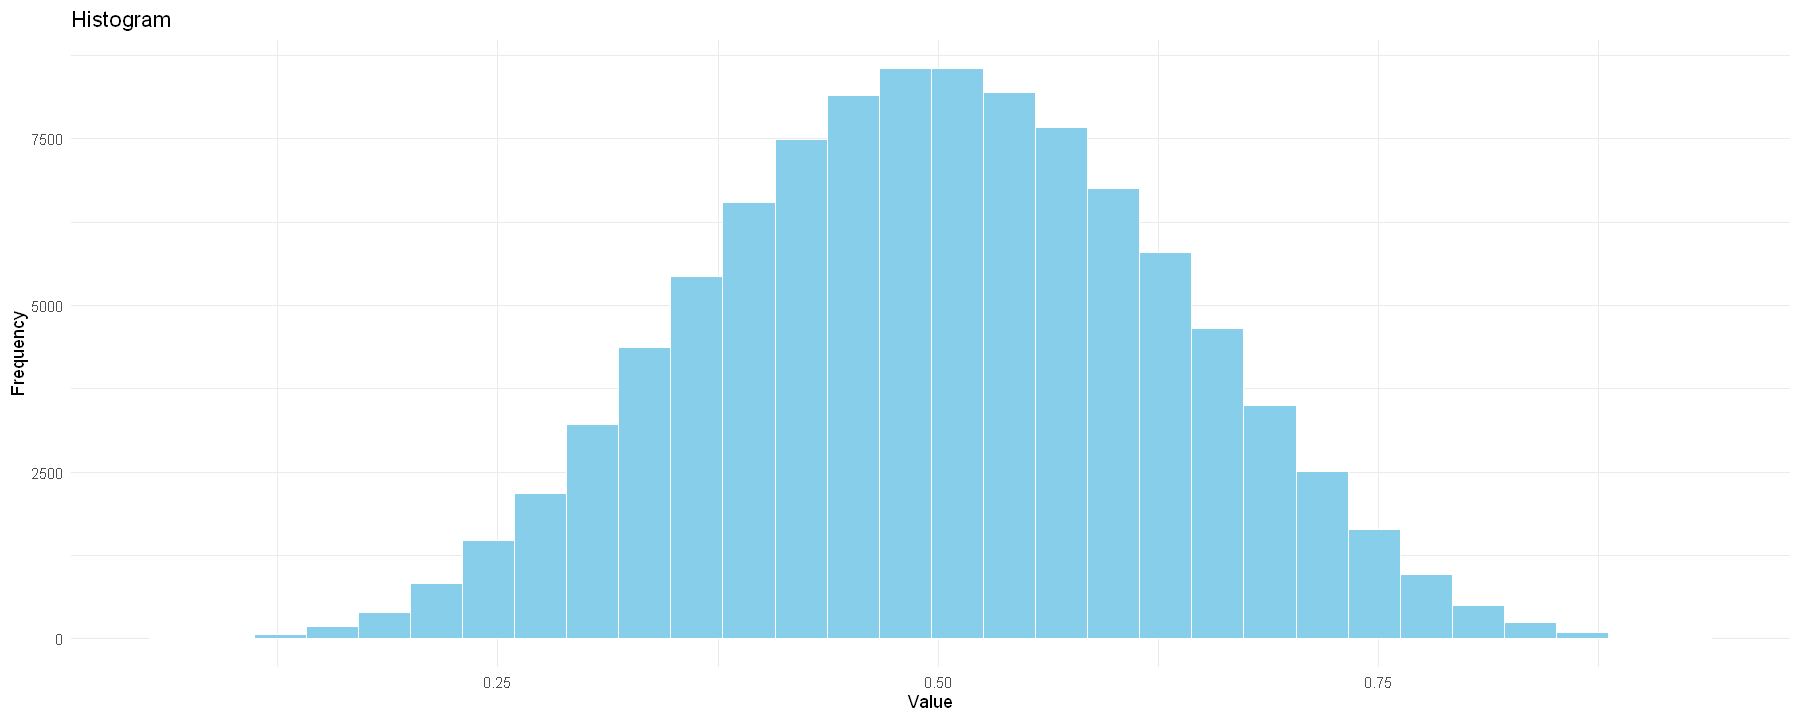

Mean of ratio: 0.500011 
Variance of ratio: 0.01675299 


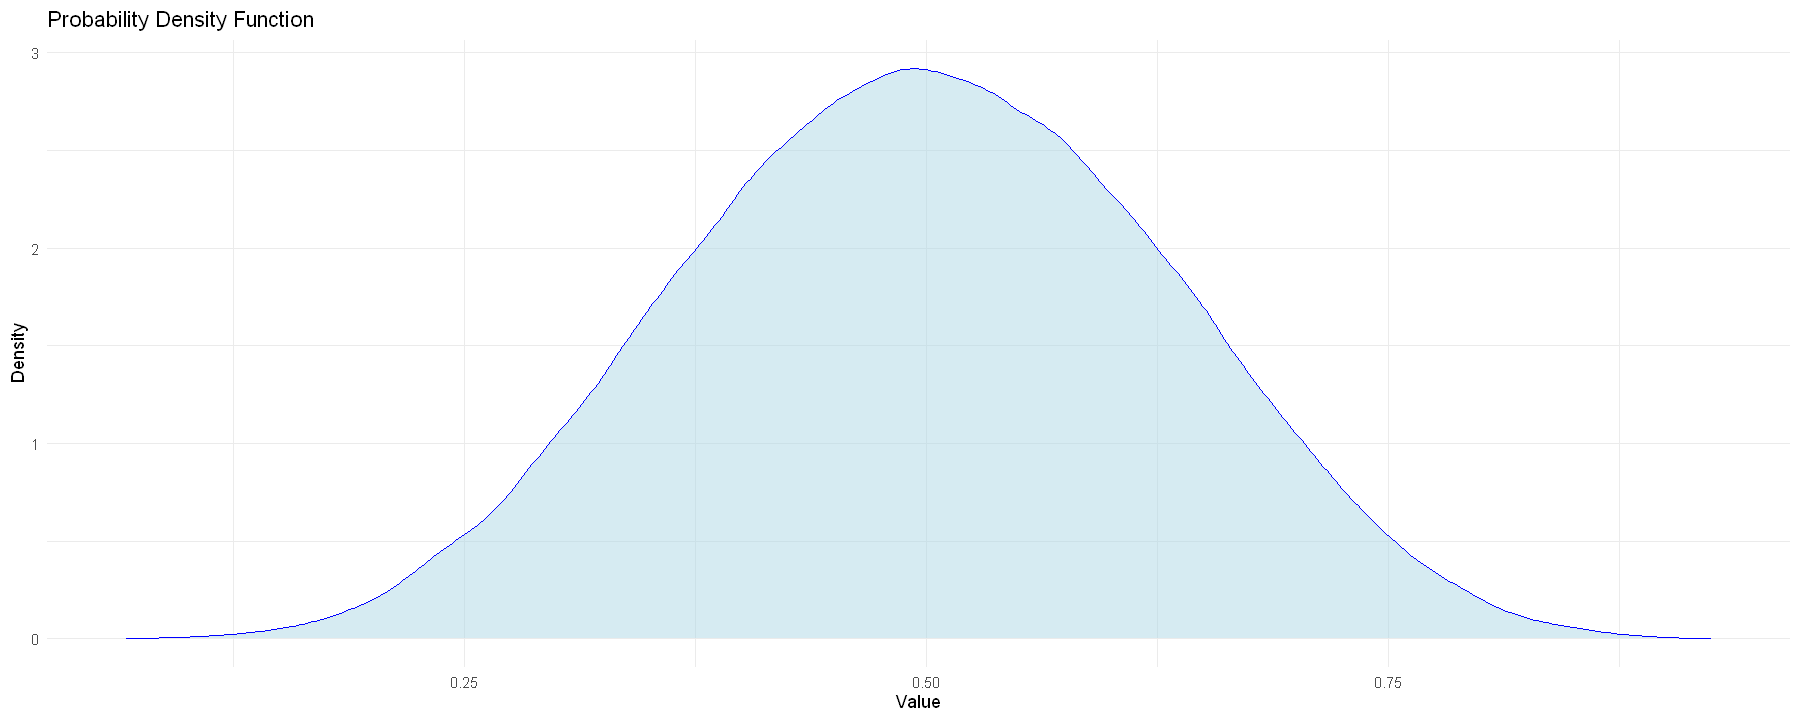

In [8]:
# TO DO
daily_losses_b <- matrix(
  rexp(n_samples * n_days, rate = lambda),
  nrow = n_samples, ncol = n_days
)
E <- rowSums(daily_losses_b)
ratio <- D / (D + E)
plot_hist(ratio)
plot_pdf(ratio)
mean_ratio <- mean(ratio)
var_ratio  <- var(ratio)
cat("Mean of ratio:", mean_ratio, "\n")
cat("Variance of ratio:", var_ratio, "\n")


### 7. By studying this distribution, calculate its parameters, then theoretically estimate its mean and variance and compare it with Section 6. (5 points🎯)

🔴 **TO DO**
 
D∼Gamma(a,θ), E∼Gamma(b,θ)


(D/D+E)∼Beta(a,b)


a=7, b=7

E[R]=a/a+b=0.5

Var[R]= ab/(a+b)^2(a+b+1)=0.016



### 8. Plot the PDF graph of the resulting beta distribution and compare it with the histogram in Section 6. (2 points🎯)

In [9]:
# TO DO
x_beta <- seq(0, 1, length.out = 1000)
y_beta <- dbeta(x_beta, shape1 = alpha_param, shape2 = beta_param)
plot_pdf_theory(
  x_beta, y_beta,
  title = "Theoretical Beta PDF",
  xlab  = "Ratio",
  ylab  = "Density"
)
plot_hist(ratio)


ERROR: Error: object 'alpha_param' not found


### 9. Now suppose the company wants to calculate the same ratio for a day instead of a week. Re-simulate this ratio. (2 points🎯)
### 10. What distribution does the resulting distribution resemble? Verify this with theoretical calculations. (2 points🎯)


X∼Exp(λ), Y∼Exp(λ), 


R(daily)=X/(X+Y)

 

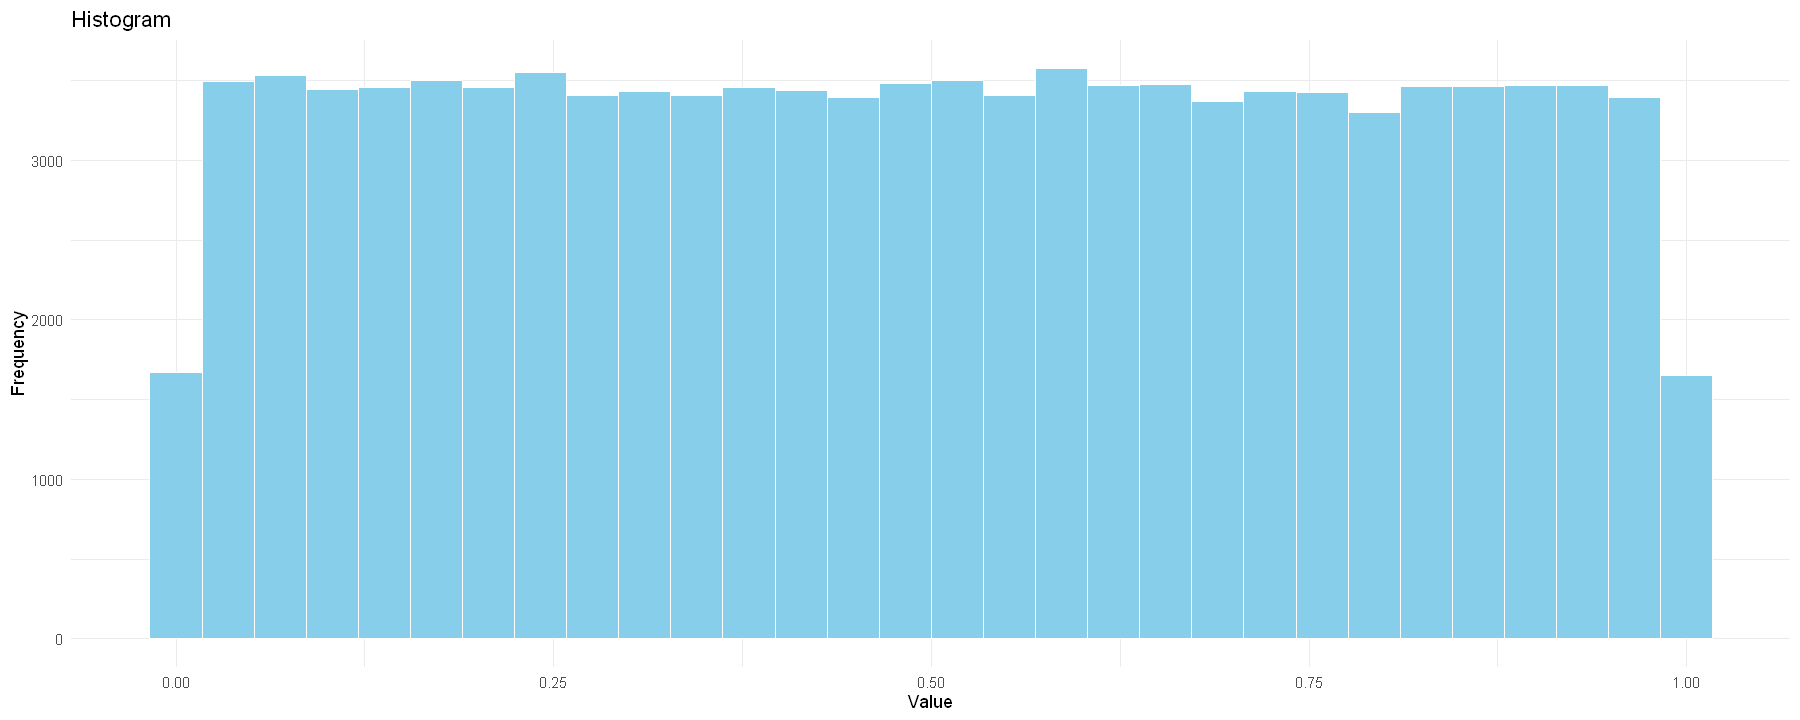

Mean of daily ratio: 0.4985399 
Variance of daily ratio: 0.08317772 


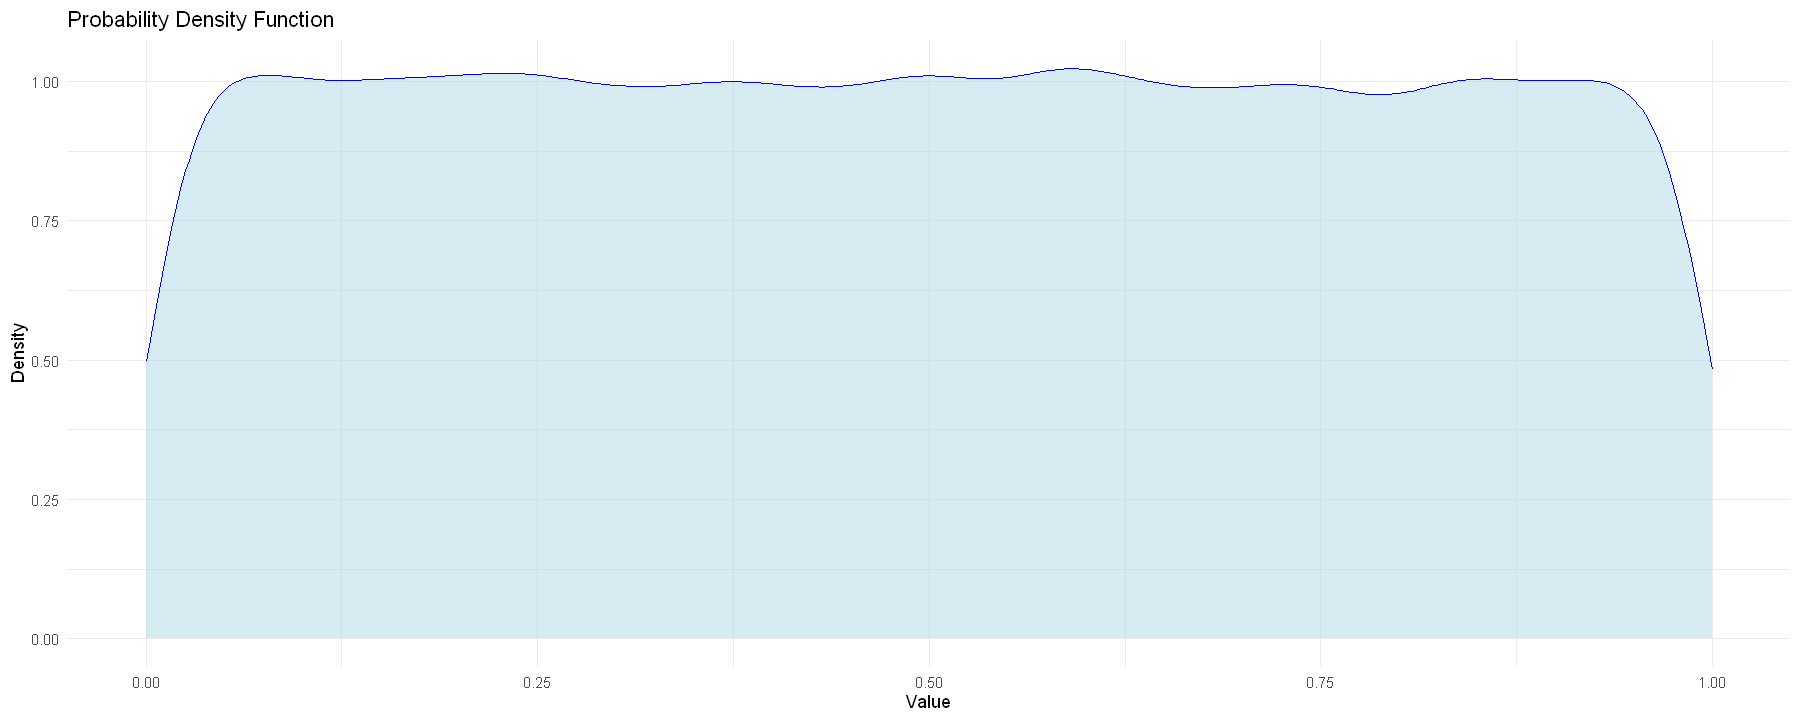

In [ ]:
# TO DO
X_daily <- rexp(n_samples, rate = lambda)
Y_daily <- rexp(n_samples, rate = lambda)
ratio_daily <- X_daily / (X_daily + Y_daily)
plot_hist(ratio_daily)
plot_pdf(ratio_daily)
cat("Mean of daily ratio:", mean(ratio_daily), "\n")
cat("Variance of daily ratio:", var(ratio_daily), "\n")




🔴 **TO DO**

X/(Y+X)∼Beta(1,1)->U(0,1)

# Question 2 (25 points🎯)
## Covariance 🌡️

We will use the built-in **airquality** dataset in R, which contains weather data for New York in 1970.

We will focus on the **Day**, **Month**, and **Temp** columns. To represent the progression of the year, we will define a new variable called **Day Number**, which indicates the number of days passed since the beginning of the year.


## Familiarize With Dataset 🌦️ (7.5 points🎯)

### 1. Plot the temperature (**Temp**) against the **Day Number**. This will help you become familiar with the dataset and observe the general trend of temperature throughout the year.

In [ ]:
head(airquality)


,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6


,Ozone,Solar.R,Wind,Temp,Month,Day,Day_Number
,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
1,41,190,7.4,67,5,1,121
2,36,118,8.0,72,5,2,122
3,12,149,12.6,74,5,3,123
4,18,313,11.5,62,5,4,124
5,NA,NA,14.3,56,5,5,125
6,28,NA,14.9,66,5,6,126


`geom_smooth()` using formula = 'y ~ x'


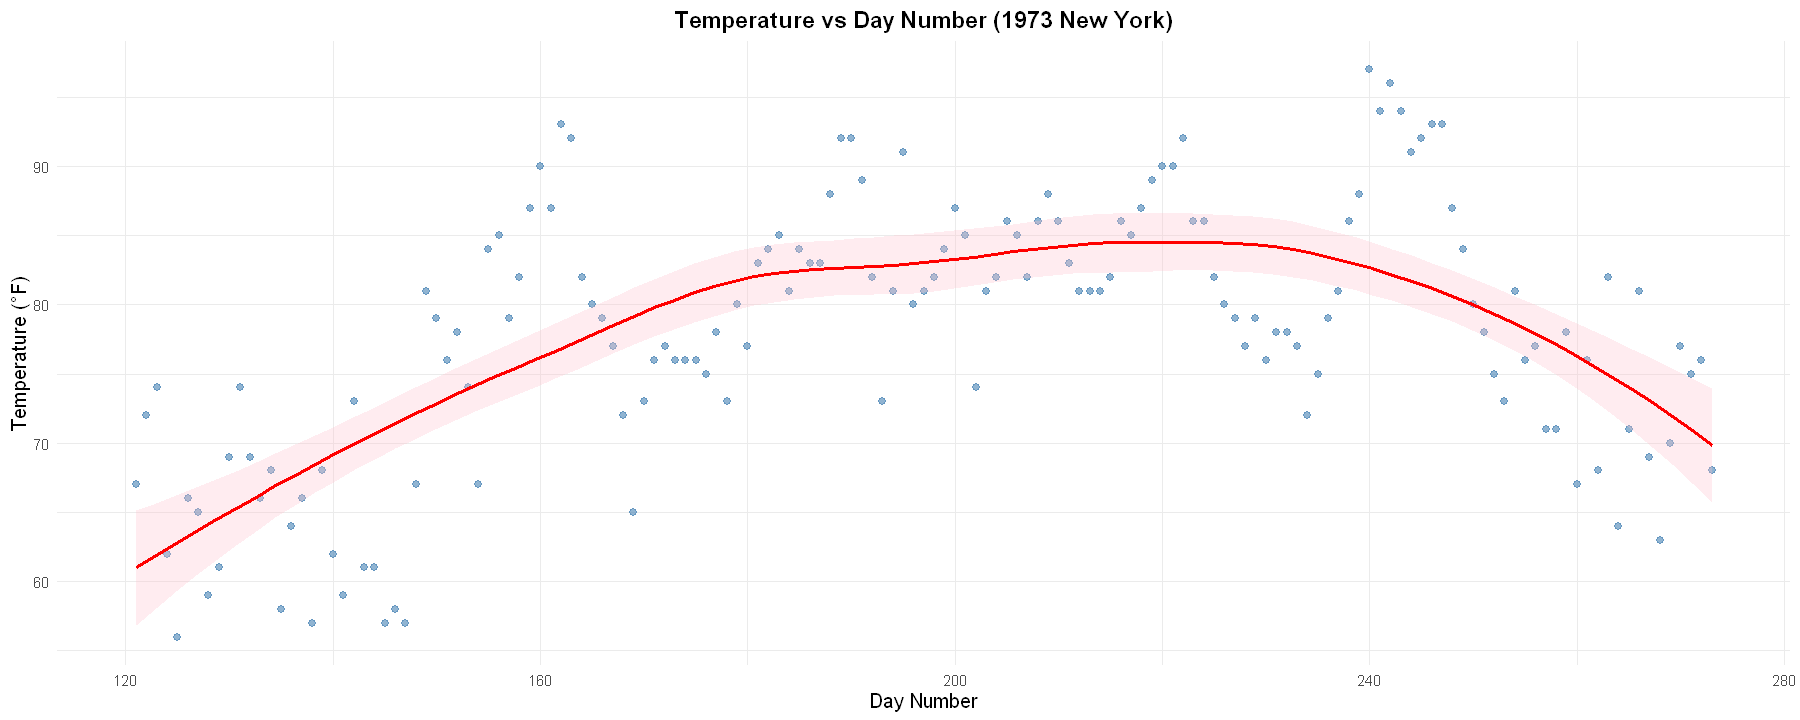

In [ ]:
# TO DO: Plot the daily temperature against the day number
data("airquality")

airquality <- airquality %>%
  mutate(Day_Number = case_when(
    Month == 5 ~ 120 + Day,
    Month == 6 ~ 151 + Day,
    Month == 7 ~ 181 + Day, 
    Month == 8 ~ 212 + Day,
    Month == 9 ~ 243 + Day  
  ))
head(airquality)
ggplot(airquality, aes(x = Day_Number, y = Temp)) +
  geom_point(color = "steelblue", size = 2, alpha = 0.6) +
  geom_smooth(method = "loess", se = TRUE, color = "red", fill = "pink", alpha = 0.3) +
  theme_minimal() +
  labs(
    title = "Temperature vs Day Number (1973 New York)",
    x = "Day Number",
    y = "Temperature (°F)"
  ) +
  theme(
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),
    axis.title = element_text(size = 12)
  )




## Correlation Function 🧙 (7.5 points🎯)

### 2. Write a function called `Calculate_Correlation` that takes two vectors, X and Y, as input and returns their correlation. You should implement the correlation calculation yourself and **not** use pre-built correlation functions from R packages.

In [ ]:
Calculate_Correlation = function(X,Y)
{
  # returns correlation of x and y
cov_value <- cov(airquality$Day_Number, airquality$Temp, use = "complete.obs")
cor_value <- cor(airquality$Day_Number, airquality$Temp, use = "complete.obs")
cat("========== Covariance and Correlation ==========\n\n")
cat("Covariance between Day Number and Temperature:", round(cov_value, 4), "\n")
cat("Correlation between Day Number and Temperature:", round(cor_value, 4), "\n\n")
cat("Interpretation:\n")
cat("- The covariance is", round(cov_value, 2), "\n")
cat("- The correlation coefficient is", round(cor_value, 3), "\n\n")

if (cor_value > 0) {
  cat("The positive correlation indicates that temperature tends to increase\n")
  cat("as the day number increases (from May to September).\n")
  cat("This makes sense as we move from spring into summer.\n")
} else {
  cat("The negative correlation indicates that temperature tends to decrease\n")
  cat("as the day number increases.\n")
}
}

## Autocorrelation 🧙‍♀️ (10 points🎯)

+ In time series data, we often analyze the relationship between a variable at a given time and its past values. This concept is called **Autocorrelation**. It helps us understand how a variable is correlated with itself over different time lags.

#### For this task, we will examine the autocorrelation of temperature with a one-day lag. Specifically, we will:

###3.  Plot the temperature on day *i* against the temperature on day *i-1*.
###4.  Calculate the correlation between these two sets of temperatures using the `Calculate_Correlation` function you implemented earlier. This is referred to as calculating the autocorrelation with a "1 shift" or "lag 1".

# A tibble: 5 × 5
  Month Mean_Temp Var_Temp SD_Temp Count
  <int>     <dbl>    <dbl>   <dbl> <int>
1     5      65.5     47.0    6.85    31
2     6      79.1     43.5    6.60    30
3     7      83.9     18.6    4.32    31
4     8      84.0     43.4    6.59    31
5     9      76.9     69.8    8.36    30


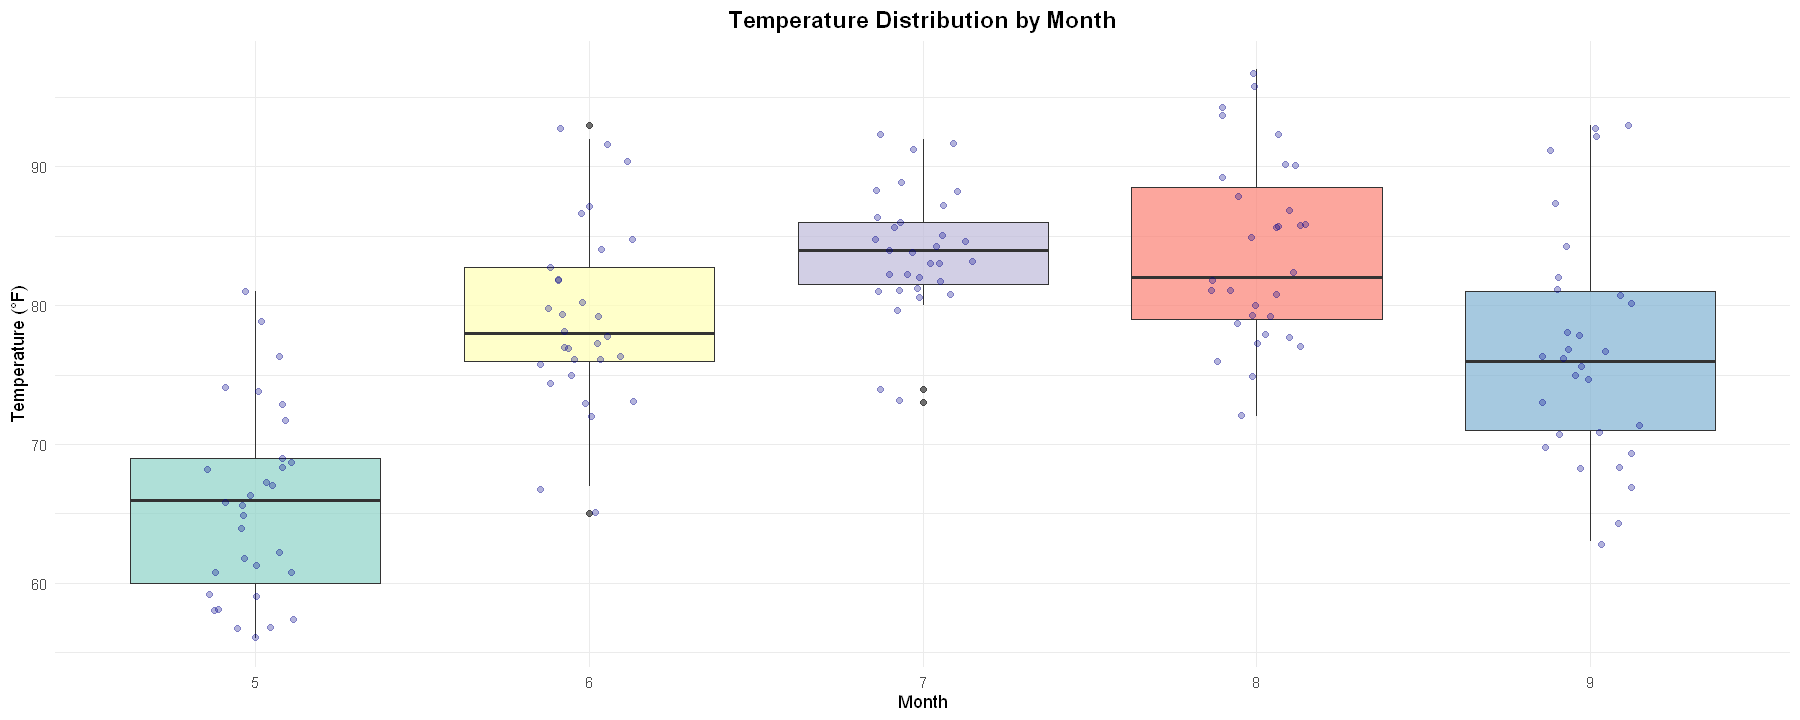

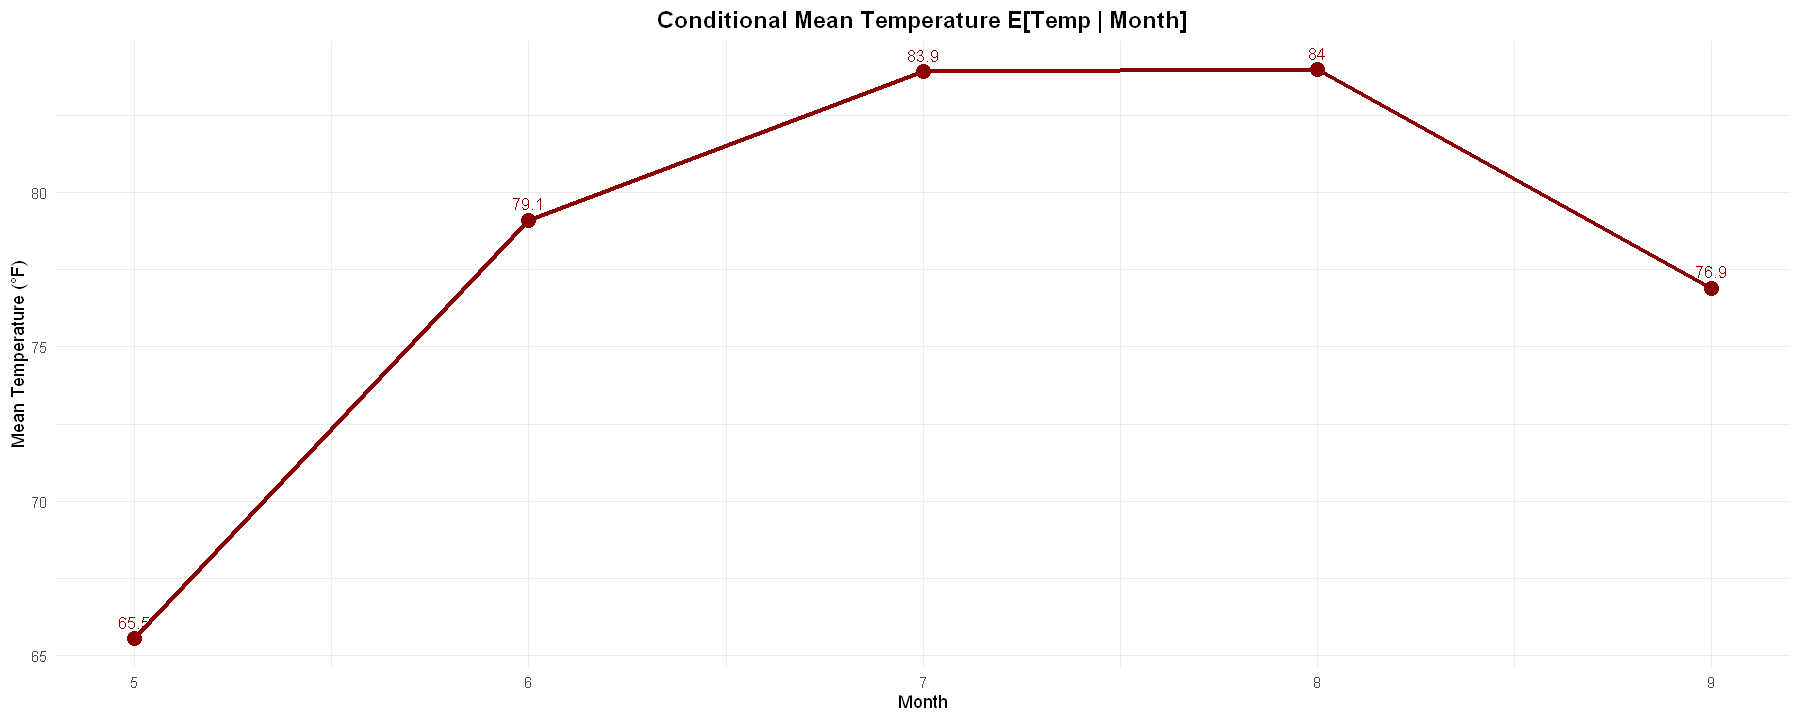

In [ ]:
# TO DO: plot temperature on day i against temperature on day i-1
# print the correlation of this plot using Calculate_Correlation
monthly_stats <- airquality %>%
  group_by(Month) %>%
  summarise(
    Mean_Temp = mean(Temp, na.rm = TRUE),
    Var_Temp = var(Temp, na.rm = TRUE),
    SD_Temp = sd(Temp, na.rm = TRUE),
    Count = n(),
    .groups = 'drop'
  )

print(monthly_stats)
ggplot(airquality, aes(x = factor(Month), y = Temp, fill = factor(Month))) +
  geom_boxplot(alpha = 0.7) +
  geom_jitter(width = 0.15, alpha = 0.3, size = 1.5, color = "darkblue") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3") +
  labs(
    title = "Temperature Distribution by Month",
    x = "Month",
    y = "Temperature (°F)",
    fill = "Month"
  ) +
  theme(
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),
    legend.position = "none"
  )

ggplot(monthly_stats, aes(x = Month, y = Mean_Temp)) +
  geom_line(color = "darkred", size = 1.2) +
  geom_point(color = "darkred", size = 4) +
  geom_text(aes(label = round(Mean_Temp, 1)), 
            vjust = -0.8, size = 3.5, color = "darkred") +
  theme_minimal() +
  scale_x_continuous(breaks = 5:9) +
  labs(
    title = "Conditional Mean Temperature E[Temp | Month]",
    x = "Month",
    y = "Mean Temperature (°F)"
  ) +
  theme(
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold")
  )


###5. We want to expand on this idead and calcualte correlation for shifts 1 to 100 and plot correlation of temperature with previous days.

In [ ]:
# TO DO: plot correlation (temperature on day i and day i - shift) against shift.
total_var_direct <- var(airquality$Temp, na.rm = TRUE)
expected_conditional_var <- monthly_stats %>%
  summarise(E_Var = weighted.mean(Var_Temp, Count, na.rm = TRUE)) %>%
  pull(E_Var)

var_conditional_mean <- var(monthly_stats$Mean_Temp, na.rm = TRUE)
total_var_decomposed <- expected_conditional_var + var_conditional_mean
cat("Direct calculation:\n")
cat("Var(Temp) =", round(total_var_direct, 4), "\n\n")
cat("Decomposition using Law of Total Variance:\n")
cat("E[Var(Temp | Month)] =", round(expected_conditional_var, 4), "\n")
cat("Var(E[Temp | Month]) =", round(var_conditional_mean, 4), "\n")
cat("Sum=", round(total_var_decomposed, 4), "\n\n")



Direct calculation:
Var(Temp) = 89.5913 

Decomposition using Law of Total Variance:
E[Var(Temp | Month)] = 44.3078 
Var(E[Temp | Month]) = 56.9643 
Sum= 101.2721 



# Question 3 (50 points🎯)
## Conditional Distribution 🤖

For this part we want to locate a robot (WALL-E) in a 10 by 15 grid like maze using it's
sensors.

WALL-E has 4 sensors in its 4 directions that inform it of the presence or absence of a wall in each direction. Each of these 4 sensors has a 10% error. The probability distribution of the result of each sensor is as follows:

$$P(\text{sensor} = 1 | \text{wall} = 1) = 0.9$$
$$P(\text{sensor} = 1 | \text{wall} = 0) = 0.1$$
$$P(\text{sensor} = 0 | \text{wall} = 1) = 0.1$$
$$P(\text{sensor} = 0 | \text{wall} = 0) = 0.9$$

WALL-E is really old and his legs 🦿 are not what they used to be, so even if he chooses to go up, he may go south!!!

given each intended direction, there is a probability of 80% of correctly moving
and 20% moving in the wrong direction (uniformly).
$$P(\text{move} = \text{UP} | \text{intendedDir} = \text{UP}) = 0.8$$
$$P(\text{move} = \text{DOWN} | \text{intendedDir} = \text{UP}) = \frac{0.2}{3}$$
$$P(\text{move} = \text{RIGHT} | \text{intendedDir} = \text{UP}) = \frac{0.2}{3}$$
$$P(\text{move} = \text{LEFT} | \text{intendedDir} = \text{UP}) = \frac{0.2}{3}$$

WALL-E may be old but it has a strong memory 🧠, it stores the history of it's beliefs(the probability of being at each cell each step, more on this later)

WALL-E  wants to find it's location with high accuracy using probabilistic methods and conditional probability to escape from the maze!!! 🌽

To solve this problem, we model it with a set of random variables. Suppose that $X_t$ represents the robot's location after t movements.
Initially the probability of the robot being present in all blocks is equal,
meaning the initial probability for each block (x,y) is:
$$P(X_{0} = (x,y)) = \frac{1}{\text{NUM OF FREE CELLS}}$$

Also, suppose we denote the data read from the sensors at time t by $E_t$ (evidence after t movements 🕵️).



**Common Mistake ✖️**

Random variables $X_{t}$ and $E_{t}$ are vectors!!!

$X_{t}$ shows the location of WALL-E using x,y coordinates for example [3,4].

$E_{t}$ shows the status of WALL-E's sensors for example [0,0,0,1] (only one sensor is on while the others are off)

In our model, $X_{t}$ only depends on $X_{t-1}$ and each $E_t$ also only depends on $X_{t}$ (independent from other random variables).

we can consider a set of random variables:

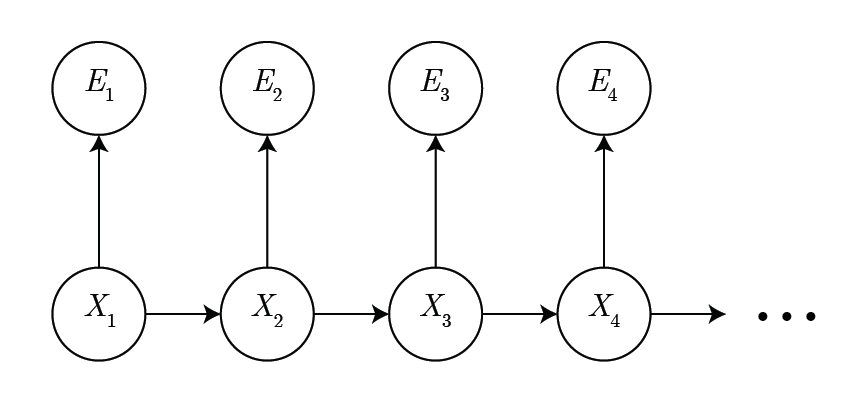


Each arrow indicates the dependence of the variable at the end of the arrow on the variable at the beginning of the arrow.

**What are we looking for? 🔍**

we are looking to estimate $X_t$ from evidences $E_1$ to $E_t$ for each block of the map. So for each step we need to obtain the following probability value:

$$ P(X_{t} | E_1, E_2, ... E_t)$$

This probability can be written as:

$$ { \color{#55cffd} {P(X_t|E_{1:t}) \propto P(X_t, E_{1:t}) \
= \sum_{X_{t-1}} P(X_{t-1}, X_t, E_{1:t}) \
= \sum_{X_{t-1}} P(X_{t-1}, E_{1:t-1}) P(X_t|X_{t-1}) P(E_t|X_t) \
\propto P(E_t|X_t) \sum_{X_{t-1}} P(X_t|X_{t-1}) P(X_{t-1} \mid E_{1:t-1})}}$$

So we will need 3 probabilities:

1. $ P(E_t|X_t) $
2. $ P(X_t|X_{t-1}) $
3. $ P(X_{t-1}, E_{1:t-1}) $

### 0. Theoretical Calculation of Presence Probability (5 points)**

- Assume we have a $2 \times 3$ grid as shown below.


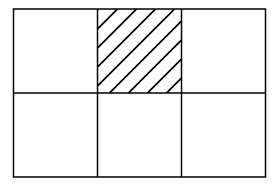

If the robot selects the **DOWN** direction and, after moving, makes the following observation:

$$E_2 = [ \text{UP} = 0, \text{RIGHT} = 0, \text{DOWN} = 1, \text{LEFT} = 1 ]$$

Then, calculate:

$$P(X_2|E_{1:2})$$

(Assume that $P(X_1|E_1)$ is uniformly $0.2$ for all empty cells).

Is the result as expected?

🔴 **0. TO DO**

P(X2=x)=∑xprev P(X2=x∣X1 =xprev ,u=DOWN)P(X1 =xprev)

E2 =[UP=0,RIGHT=0,DOWN=1,LEFT=1].

P(X2∣E1:2)∝P(E2∣X2)×P(X2)

### Basic definitions
This section contains the map, list of movements and constant values.
+ 🔴 **You do not need to change this section.**

+ The function `generate_directions` generates a sequence of moves specified by the strings u, l, d, r and outputs the list of moves.

In [ ]:
generate_directions <- function(map, start_pos = c(2, 3), n = 300, valid_ratio = 0.9) {
  directions <- c("u", "d", "l", "r")
  moves <- list(u = c(-1, 0), d = c(1, 0), l = c(0, -1), r = c(0, 1))

  pos <- start_pos
  chosen_dirs <- character(0)
  valid_moves <- 0

  NUM_ROWS <- nrow(map)
  NUM_COLS <- ncol(map)

  while (length(chosen_dirs) < n) {
    dir <- sample(directions, 1)
    new_pos <- pos + moves[[dir]]

    if (new_pos[1] < 1 || new_pos[1] > NUM_ROWS ||
        new_pos[2] < 1 || new_pos[2] > NUM_COLS ||
        map[new_pos[1], new_pos[2]] == 1) {
      if (runif(1) > valid_ratio) {
        chosen_dirs <- c(chosen_dirs, dir)
      }
    } else {
      pos <- new_pos
      chosen_dirs <- c(chosen_dirs, dir)
      valid_moves <- valid_moves + 1
    }
  }

  return(chosen_dirs)
}

In [ ]:
map <- matrix(c(
  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
  1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
  1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
  1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
  1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
  1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
  1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
  1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
), nrow = 15, ncol = 10) %>% t()

dim = dim(map)

NUM_ROWS = dim[1]
NUM_COLS = dim[2]
SENSOR_ERROR = 0.1
MOVE_ERROR = 0.2
INITIAL_POS = c(2,3)

# List of robot movements Generated by a function. You can change the percentage of moves that are valid (do not hit the wall) and the number of moves.
# The output is a list of 4 letters u, d, l, r.
chosen_dirs <- generate_directions(map, start_pos = INITIAL_POS, n = 300, valid_ratio = 0.9)

actions <- list(
  u = c(y = -1, x = 0),
  d = c(y = 1, x = 0),
  l = c(y = 0, x = -1),
  r = c(y = 0, x = 1)
)

action_names <- names(actions)


###  1. Finding The Evidence!!! 🔍
+ a function that takes WALL-E's current position and the map and returns the values of the top, right, bottom, and left sensors (4 element list).
These are the values of WALL-E's sensors (or evidences of our model).

+ 🔴 **You do not need to change this section.**


In [ ]:
sensor <- function(map, current_pos) {

  get_single_reading <- function(target_pos) {

    is_wall_present <- FALSE
    if (map[target_pos[1], target_pos[2]] == 1) {
      is_wall_present <- TRUE
    }
    true_value <- ifelse(is_wall_present, 1, 0)

    random_chance <- runif(1)
    if (random_chance <= (1 - SENSOR_ERROR)) {
      return(true_value)
    }
    else {
      return(1 - true_value)
    }
  }

  pos_up <- current_pos + actions$u
  pos_down <- current_pos + actions$d
  pos_left <- current_pos + actions$l
  pos_right <- current_pos + actions$r

  reading_up <- get_single_reading(pos_up)
  reading_down <- get_single_reading(pos_down)
  reading_left <- get_single_reading(pos_left)
  reading_right <- get_single_reading(pos_right)

  return(list(u = reading_up, r = reading_right, d = reading_down, l = reading_left))
}

### 2. **TO-DO:** Find WALL-E's Next Position 🔍 (10 points🎯)
+ Write a function that takes WALL-E's current position and it's chosen direction and returns the position after the movement.

In [ ]:
# move <- function(map, current_pos, chosen_dir) {
#  return : the robot's position after movement.
# }
move <- function(map, current_pos, chosen_dir) {
  moves <- list(u = c(-1, 0), d = c(1, 0), l = c(0, -1), r = c(0, 1))
  delta <- moves[[chosen_dir]]
  new_pos <- current_pos + delta
  rows <- nrow(map)
  cols <- ncol(map)
  
  if (new_pos[1] < 1 || new_pos[1] > rows || 
      new_pos[2] < 1 || new_pos[2] > cols) {
    return(current_pos)
  }
  if (map[new_pos[1], new_pos[2]] == 1) {
    return(current_pos)
  }
  return(new_pos)
}


### 3.  **TO-DO:** Calculating $ P(E_t|X_t) $ 🧮 (10 points🎯)
+ 3.1. Theoritically calculate the above probability using $E_t = [0,1,0,1]$ and $X_t = [3,4]$ for the map given above.
+ 3.2. Write a function that takes the last evidence ($E_t$) and WALL-E's position ($X_t$) and return the probability $ P(E_t|X_t) $.
+ 3.3. Check your 3.1. answer using 3.2. function

🔴 **3.1 TO DO**

Center (3,4): Wall (1)

UP (2,4): Empty (0)

RIGHT (3,5): Empty (0)

DOWN (4,4): Empty (0)

LEFT (3,3): Wall (1)

UP: Observation 0 matches True State 0 (Empty). P=1−ϵ=0.9

RIGHT: Observation 1 mismatches True State 0 (Empty). P=ϵ=0.1

DOWN: Observation 0 matches True State 0 (Empty). P=1−ϵ=0.9

LEFT: Observation 1 matches True State 1 (Wall). P=1−ϵ=0.9

P(Et∣Xt)=0.9×0.1×0.9×0.9=0.0729

3.2. **$ P(E_t|X_t) $ Function**

In [ ]:
# cal_observation_prob <- function(map, xt, et) {
#   return : Observation probability given the robot's position
# }

cal_observation_prob <- function(map, xt, et) {
  dirs <- list(u = c(-1, 0), r = c(0, 1), d = c(1, 0), l = c(0, -1))
  dir_names <- c("u", "r", "d", "l")
  prob <- 1.0
  rows <- nrow(map)
  cols <- ncol(map)
  for (i in 1:4) {
    d <- dirs[[i]]
    neighbor_pos <- xt + d
    is_wall <- FALSE
    if (neighbor_pos[1] < 1 || neighbor_pos[1] > rows || 
        neighbor_pos[2] < 1 || neighbor_pos[2] > cols) {
      is_wall <- TRUE
    } else if (map[neighbor_pos[1], neighbor_pos[2]] == 1) {
      is_wall <- TRUE
    }
    true_reading <- ifelse(is_wall, 1, 0)
    observed_reading <- et[i]
    if (observed_reading == true_reading) {
      prob <- prob * (1 - SENSOR_ERROR)
    } else {
      prob <- prob * SENSOR_ERROR
    }
  }
  
  return(prob)
}


3.3. **Comparing the results**

In [ ]:
# Call the cal_observation_prob function with map, xt = (3,4), and et = [0,1,0,1]

xt_test <- c(3, 4)
et_test <- c(0, 1, 0, 1) 
prob_val <- cal_observation_prob(map, xt_test, et_test)

print(paste("Calculated Probability:", prob_val))

[1] "Calculated Probability: 0.0729"


### 4. **TO-DO:** Calculating $ P(X_t|X_{t-1}) $ 🧮 (10 points🎯)
+ Write a function that takes $X_t$, $X_{t-1}$, and the direction chosen by the WALL-E and outputs the probability that WALL-E will go from $X_{t-1}$ to $X_t$ given the input direction.

+ For example, `f((3,4), (3,5) , 'u')` is equal to the probability that WALL-E will go from house (3,5) to (3,4) while choosing the up direction.

+ Note: If $X_{t-1}$ were a wall, we would return 0.

+ Note: If $X_{t-1}$ were not a neighbor of $X_t$ or $X_t$ itself, it is clearly impossible for the robot to go from $X_{t-1}$ to $X_t$. So we would return 0.

+ Note: If $X_t$ were a wall, we would return 0.

In [ ]:
# cal_move_prob <- function(map, xt, xt_minus_1, chosen_dir) {
#   return: The probability that the robot will go from position X_{t-1} to X_{t} given the chosen direction
# }
cal_move_prob <- function(map, xt, xt_minus_1, chosen_dir) {
  if (map[xt[1], xt[2]] == 1) return(0)
  if (map[xt_minus_1[1], xt_minus_1[2]] == 1) return(0)
  moves <- list(u = c(-1, 0), d = c(1, 0), l = c(0, -1), r = c(0, 1))
  delta <- moves[[chosen_dir]]
  target_pos <- xt_minus_1 + delta
  rows <- nrow(map)
  cols <- ncol(map)
  target_is_blocked <- FALSE
  if (target_pos[1] < 1 || target_pos[1] > rows || 
      target_pos[2] < 1 || target_pos[2] > cols) {
    target_is_blocked <- TRUE
  } else if (map[target_pos[1], target_pos[2]] == 1) {
    target_is_blocked <- TRUE
  }
  if (target_is_blocked) {
    if (all(xt == xt_minus_1)) {
      return(1.0) 
    } else {
      return(0.0)
    }
  }
  
  if (!target_is_blocked) {
    if (all(xt == target_pos)) {
      return(1.0 - MOVE_ERROR)
    }
    else if (all(xt == xt_minus_1)) {
      return(MOVE_ERROR)
    }
    else {
      return(0.0)
    }
  }
  
  return(0.0)
}


### 5. **TO-DO:** Main program loop 🔁 (10 points🎯)

+ Write the main loop using the model's formula provided to calculate $P(X_t| E_{1:t})$
+ Don't forget to normalize !! you can use the normalize function below to normalize the belief.

Complete the `model` function so that it returns a binary list of the model's beliefs and the robot's actual positions by taking the map and the chosen directions of the robot:

`return (list(beliefs = beliefs, real_pos = real_pos))`

#### Initializing
Initializing the belief list and the WALL-E's actual position
+ Note: The `beliefs` is a list to store WALL-E's belief about its location at each time step. Each element in this list will be a matrix representing the probability distribution of the robot being in each cell of the grid (belief). Initially, we add a uniform distribution to it.

❗ Beliefs is used to simulate our model and real postions is used to simulate real tracking of WALL-E. we can find our model's perfomance by comparing
beliefs and real positions.

In [ ]:
normalize <- function(m) {
  total_sum <- sum(m)
  normalized_m <- m / total_sum
  return(normalized_m)
}

In [ ]:
model <- function(map, chosen_dirs) {

  current_pos <- INITIAL_POS

  real_pos = list()
  beliefs <- list()

  initial_probs <- function(map) {
    num_zeros <- sum(map == 0)
    if (num_zeros == 0) {
      return(matrix(0, nrow = nrow(map), ncol = ncol(map)))
    }
    replacement_value <- 1 / num_zeros
    output_mat <- ifelse(map == 0, replacement_value, 0)
    return(output_mat)
  }

  B <- initial_probs(map)
  beliefs <- append(beliefs, list(B))
  real_pos <- append(real_pos, list(INITIAL_POS))
  rows <- nrow(map)
  cols <- ncol(map)
  for (i in 1:length(chosen_dirs)) {
    dir <- chosen_dirs[i]
    current_pos <- move(map, current_pos, dir)
    real_pos[[i+1]] <- current_pos
    E_t <- sensor(map, current_pos) 
    predicted_belief <- matrix(0, nrow=rows, ncol=cols)
        for (r_prev in 1:rows) {
          for (c_prev in 1:cols) {
            if (B[r_prev, c_prev] > 0) {
              prev_loc <- c(r_prev, c_prev)
            target_delta <- switch(dir, u=c(-1,0), d=c(1,0), l=c(0,-1), r=c(0,1))
            target_loc <- prev_loc + target_delta

            blocked <- (target_loc[1] < 1 || target_loc[1] > rows || 
                      target_loc[2] < 1 || target_loc[2] > cols || 
                      map[target_loc[1], target_loc[2]] == 1)
          
            if (blocked) {
            predicted_belief[r_prev, c_prev] <- predicted_belief[r_prev, c_prev] + B[r_prev, c_prev] * 1.0
            } else {
            predicted_belief[target_loc[1], target_loc[2]] <- predicted_belief[target_loc[1], target_loc[2]] + B[r_prev, c_prev] * (1 - MOVE_ERROR)
            predicted_belief[r_prev, c_prev] <- predicted_belief[r_prev, c_prev] + B[r_prev, c_prev] * MOVE_ERROR
          }
        }
      }
    }
    
    posterior_belief <- matrix(0, nrow=rows, ncol=cols)
    
    for (r in 1:rows) {
      for (c in 1:cols) {
         if (map[r, c] == 0) {
             likelihood <- cal_observation_prob(map, c(r, c), E_t)
             posterior_belief[r, c] <- predicted_belief[r, c] * likelihood
         }
      }
    }
    B <- normalize(posterior_belief)
    beliefs[[i+1]] <- B
  }


  return (list(beliefs = beliefs, real_pos = real_pos))
}

In [ ]:
result <- model(map, chosen_dirs)
beliefs <- result$beliefs
real_pos = result$real_pos

ERROR: Error in model(map, chosen_dirs): could not find function "model"


### 6. Visualization 🎨

The following function is used to draw the Maze Heatmap.
+ 🔴 **You do not need to change this section.**

In [ ]:
plot_belief_map <- function(map, belief, current_pos) {
  rows <- nrow(map)
  cols <- ncol(map)
  max_idx <- which.max(belief)
  max_belief_pos <- arrayInd(max_idx, .dim = c(rows, cols))
  plot(NA, xlim = c(0, cols), ylim = c(0, rows), type = "n",
       xlab = "", ylab = "", main = "Robot Belief State",
       xaxs = "i", yaxs = "i", xaxt = 'n', yaxt = 'n', asp = 1)
  max_b <- max(belief)
  norm_belief <- if (max_b > 0) belief / max_b else belief
  col_palette <- colorRampPalette(c("#F7FBFF", "#6BAED6", "#08306B"))(101)
  for (r in 1:rows) {
    for (c in 1:cols) {
      xleft <- c - 1
      ybottom <- rows - r
      xright <- c
      ytop <- rows - r + 1

      if (map[r, c] == 1) {
        rect(xleft, ybottom, xright, ytop, col = "grey20", border = "grey50")
      } else {
        color_idx <- floor(norm_belief[r, c] * 100) + 1
        rect(xleft, ybottom, xright, ytop, col = col_palette[color_idx], border = "grey50")
      }
    }
  }
  rect(max_belief_pos[2] - 1, rows - max_belief_pos[1],
       max_belief_pos[2], rows - max_belief_pos[1] + 1,
       border = "#00FFFF", lwd = 4)
  text(x = current_pos[2] - 0.5, y = rows - current_pos[1] + 0.5,
       labels = "X", col = "red", font = 2, cex = 2)
}

### 7. Results 🚀
Using lists `beliefs` and `real_pos`, we'll draw the maze at each step.
+ 🔴 **You do not need to change this section.**

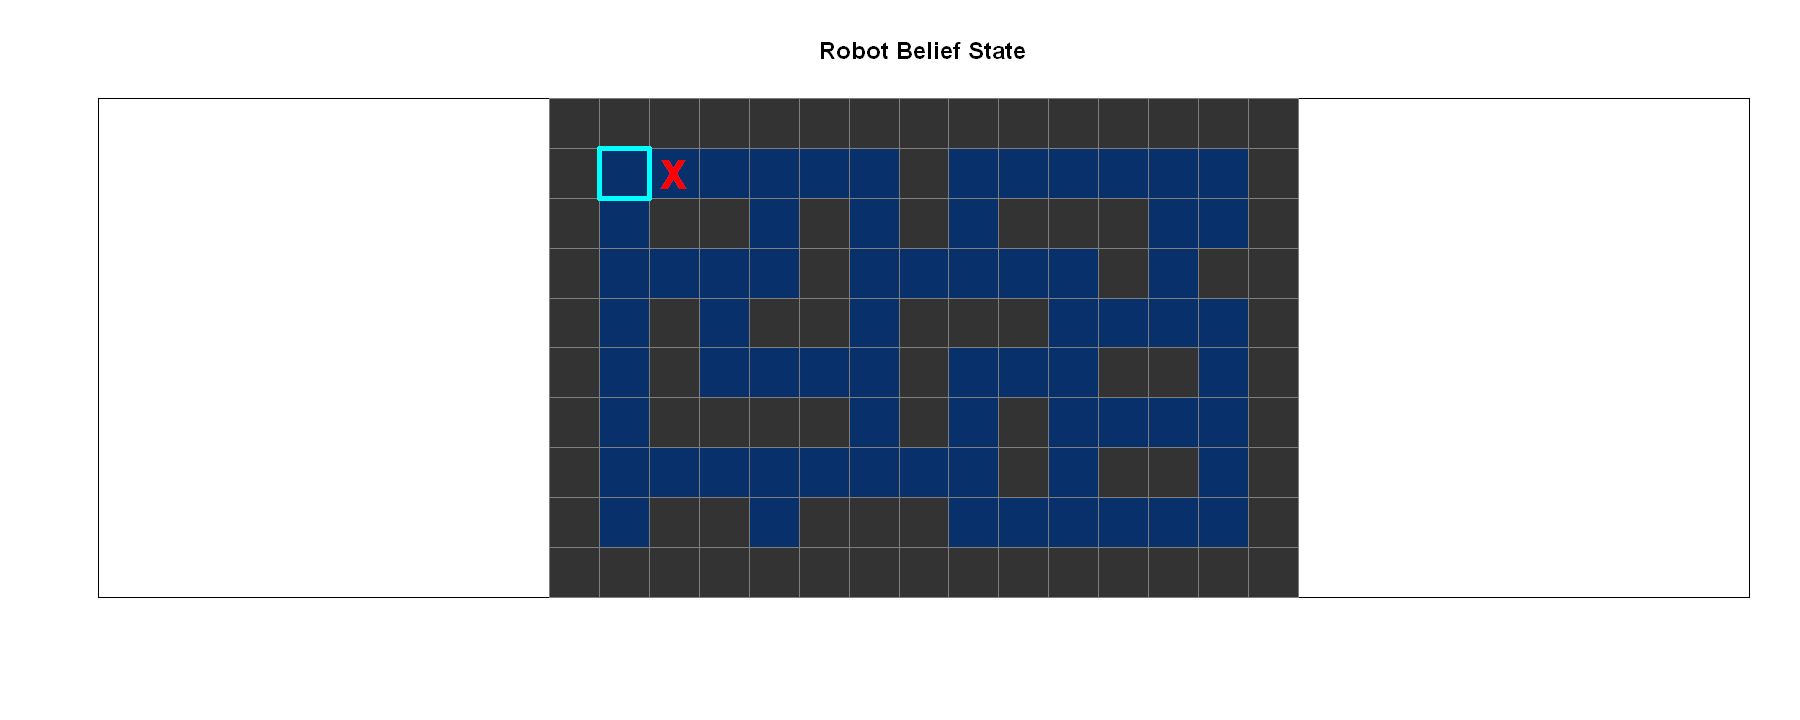

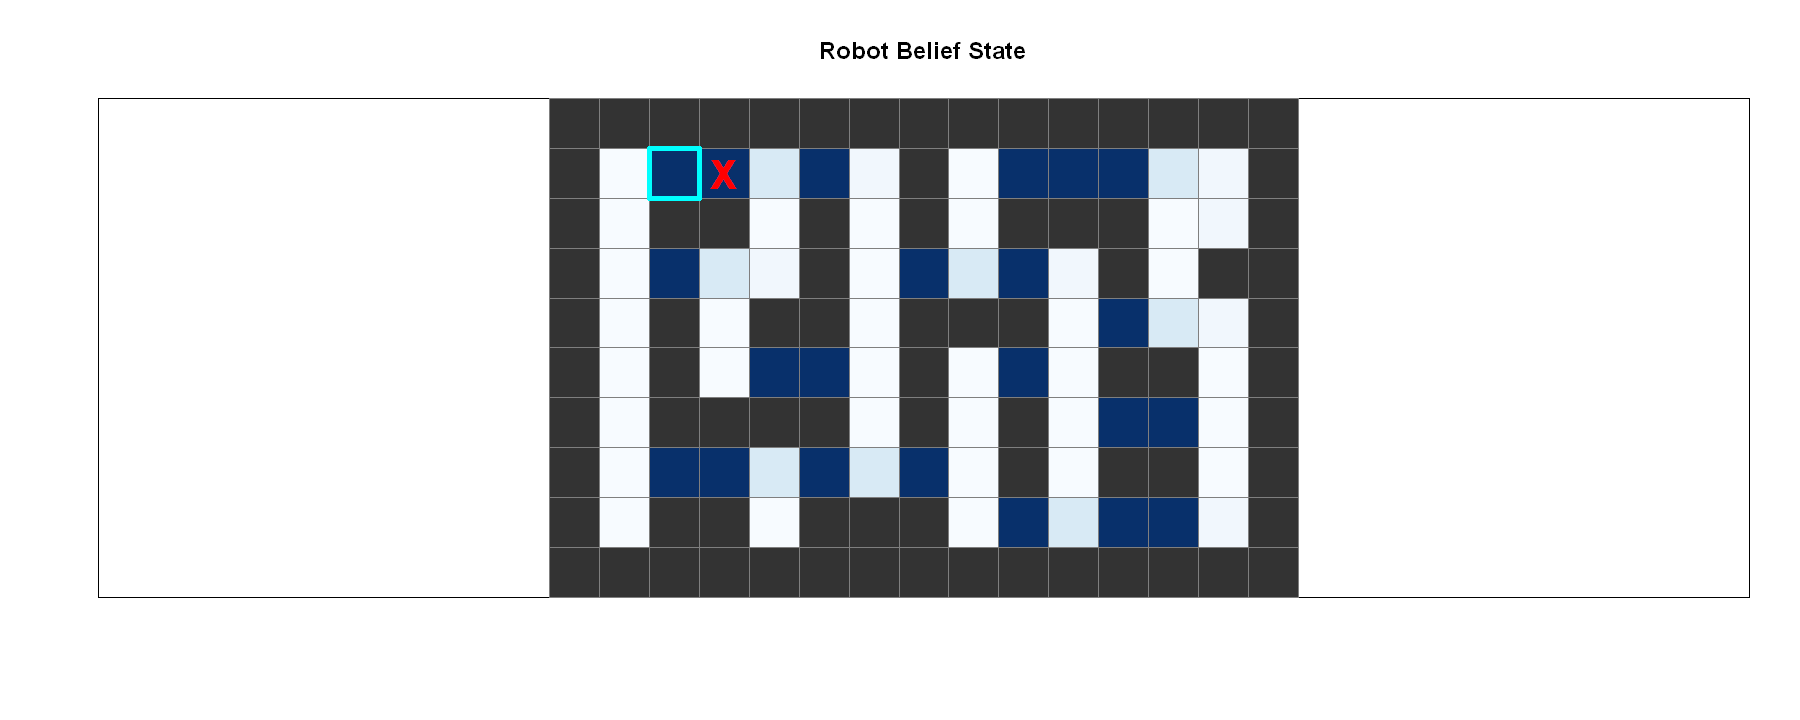

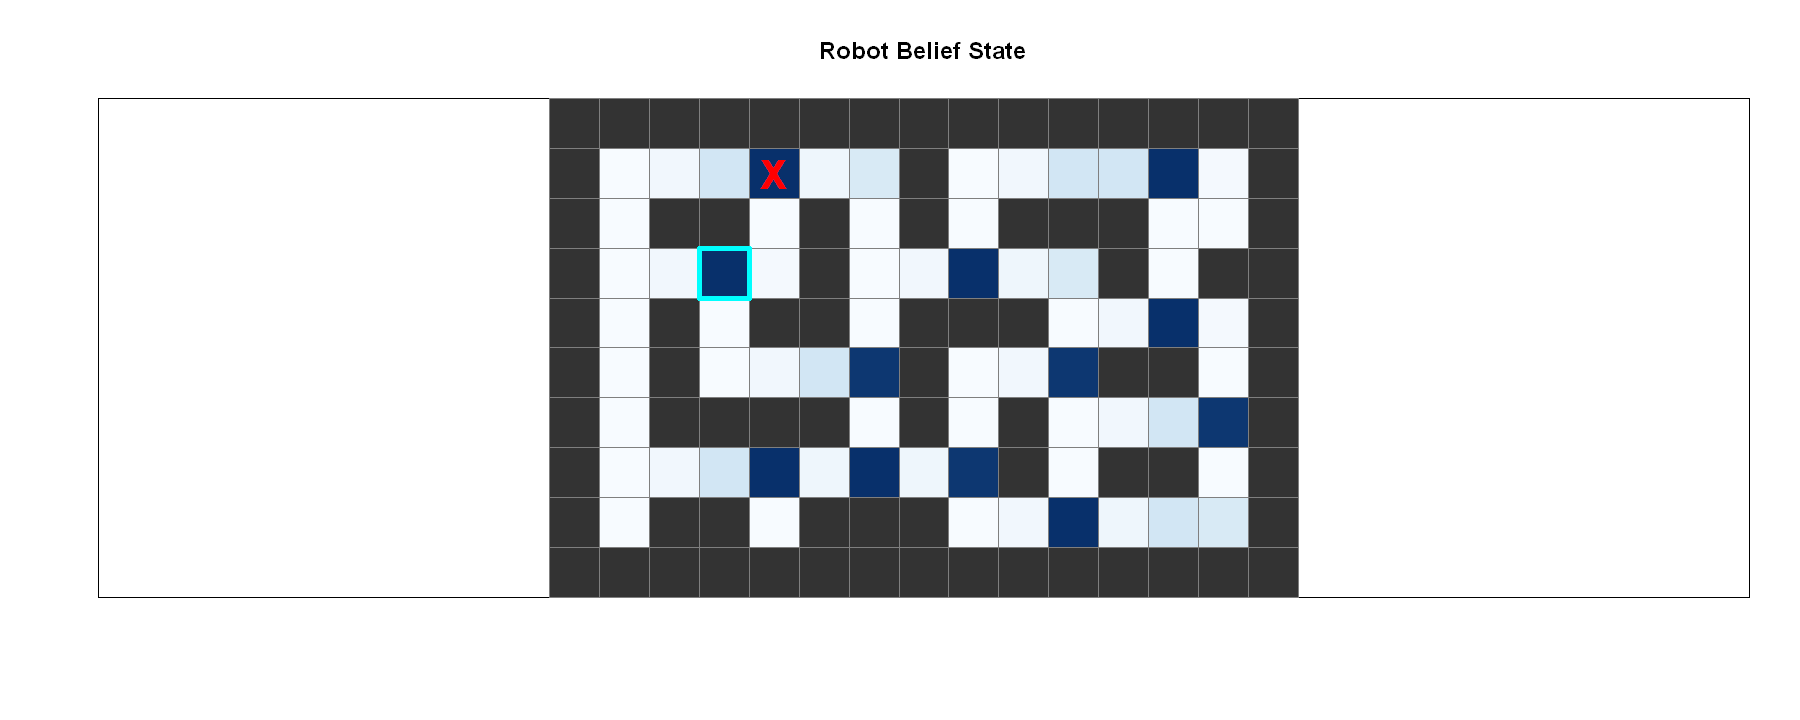

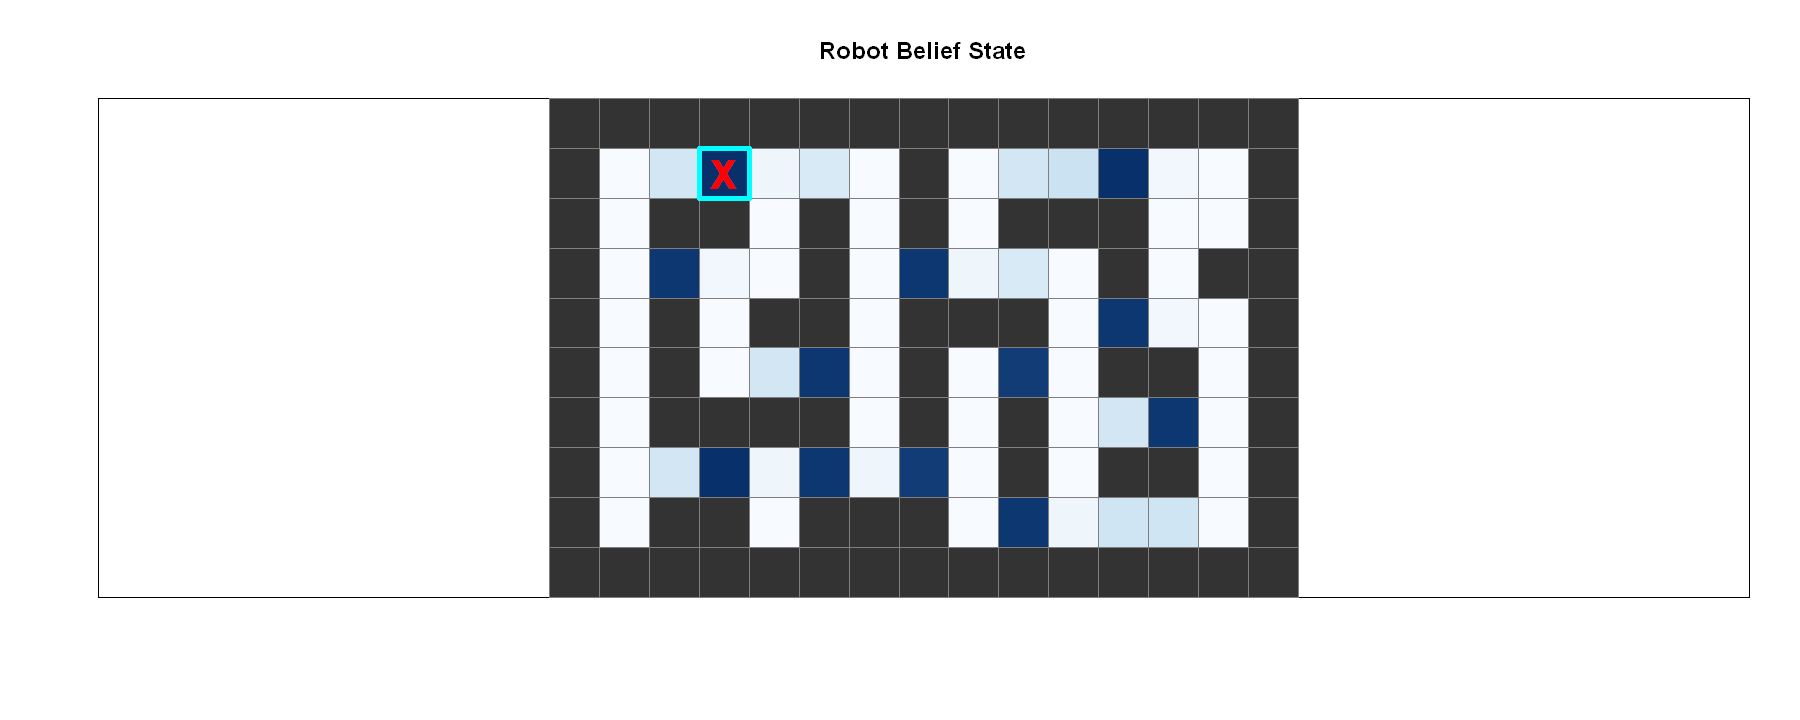

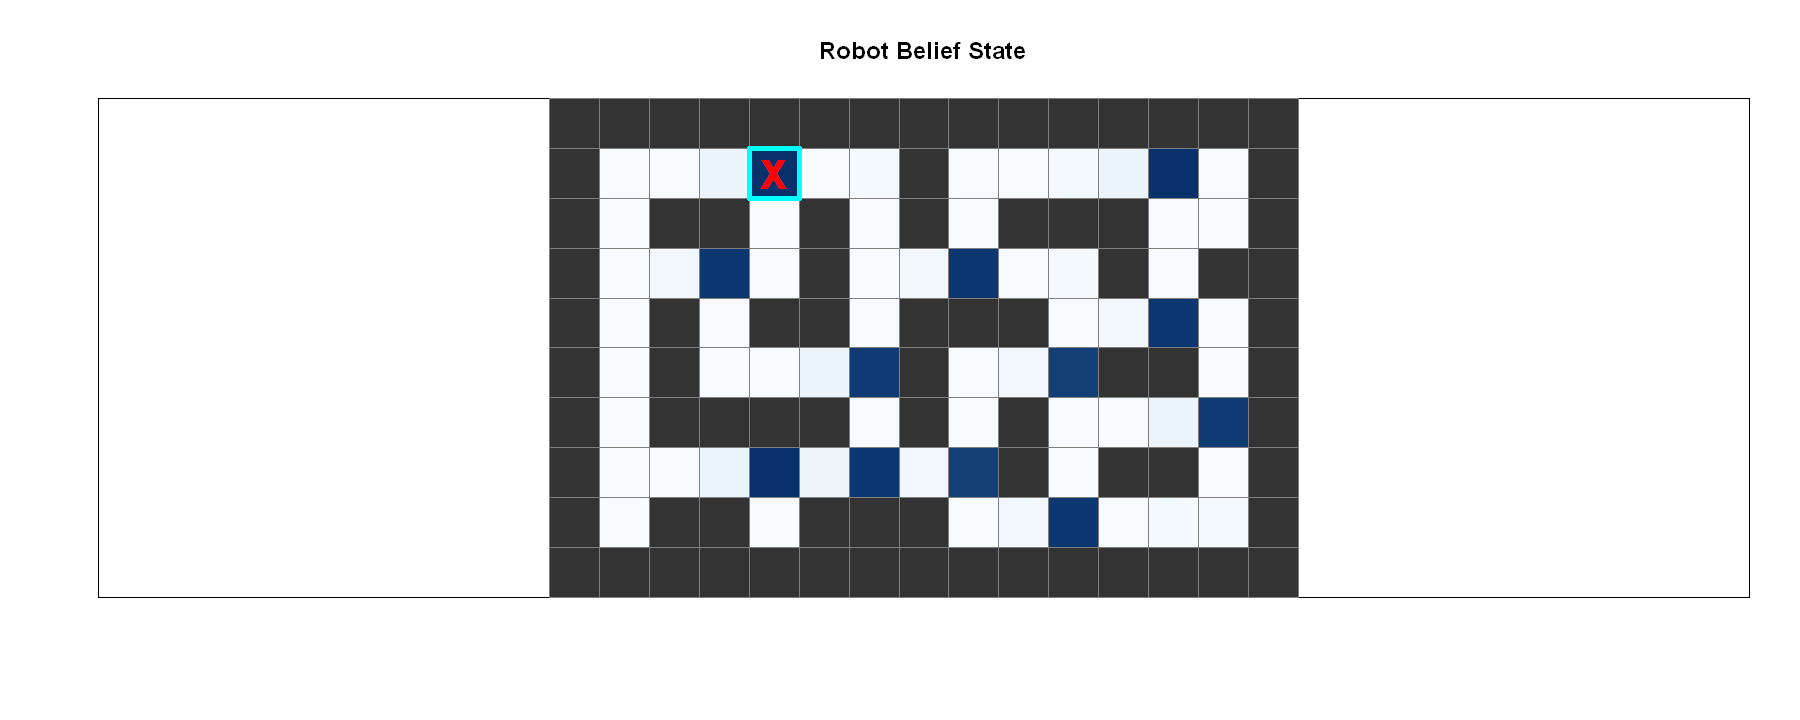

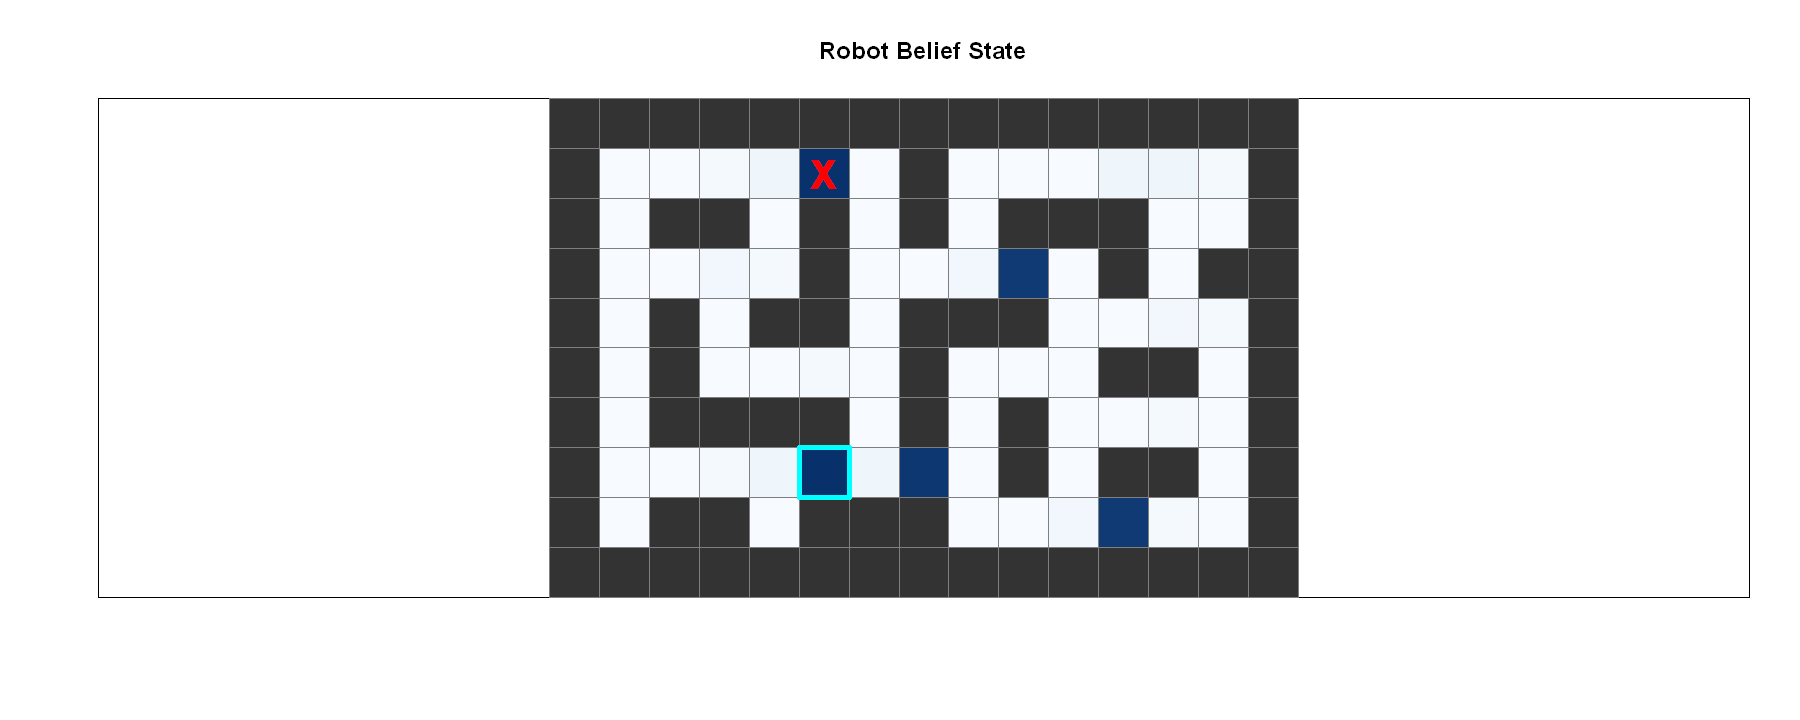

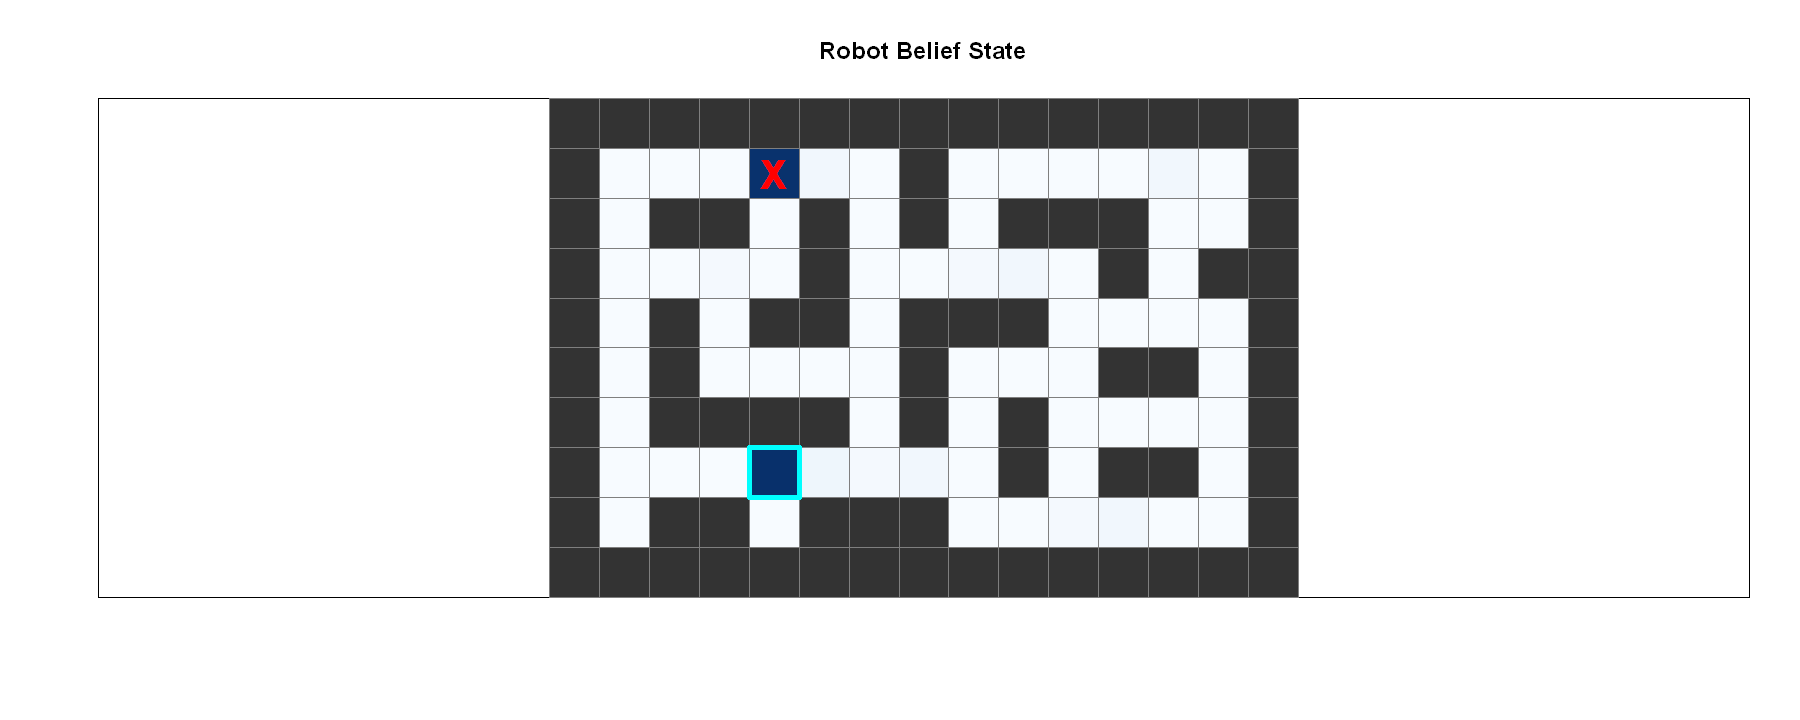

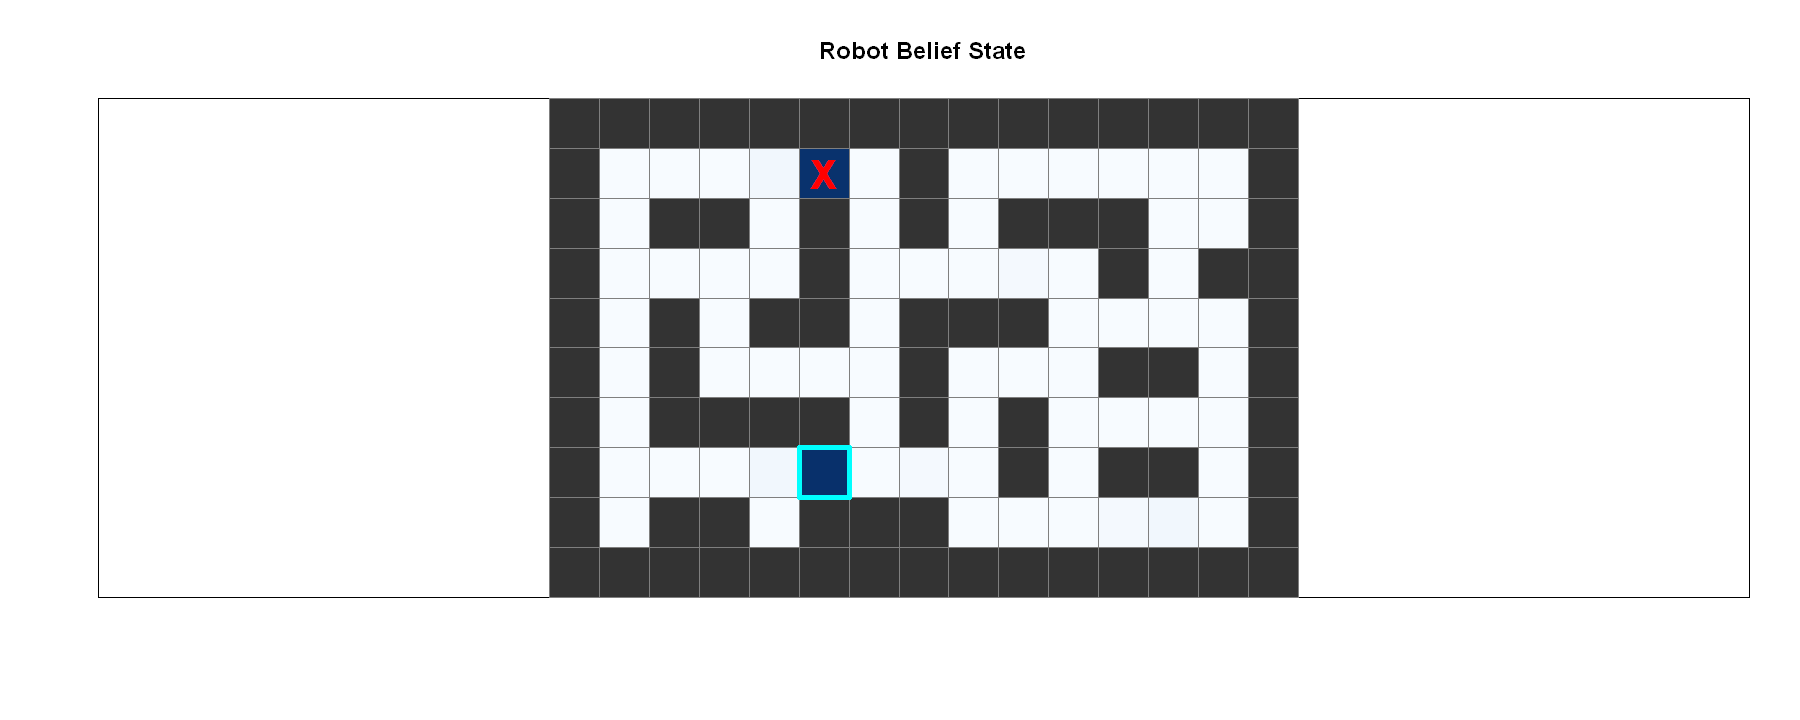

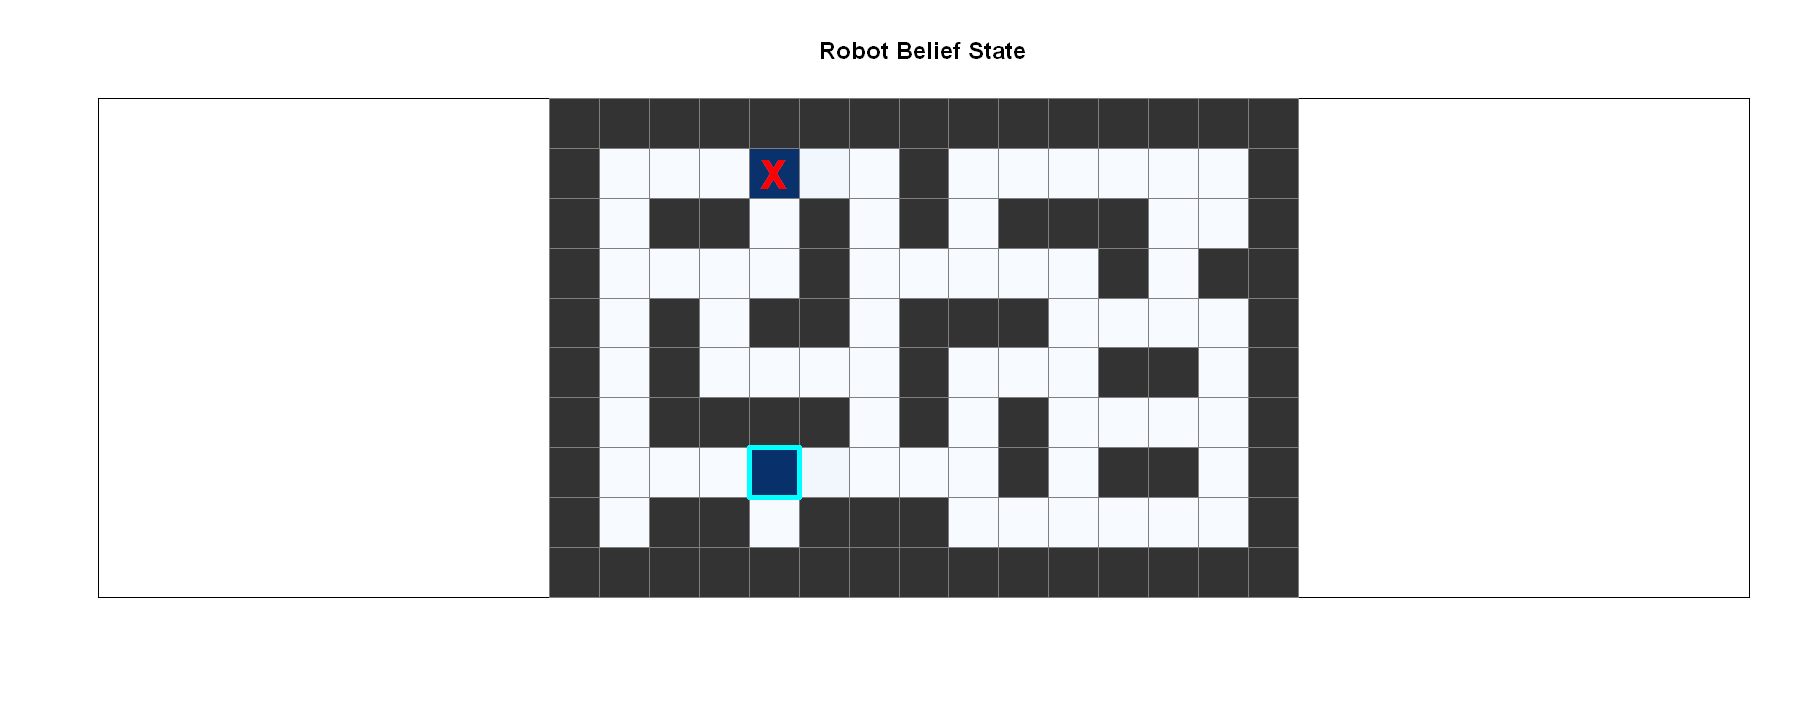

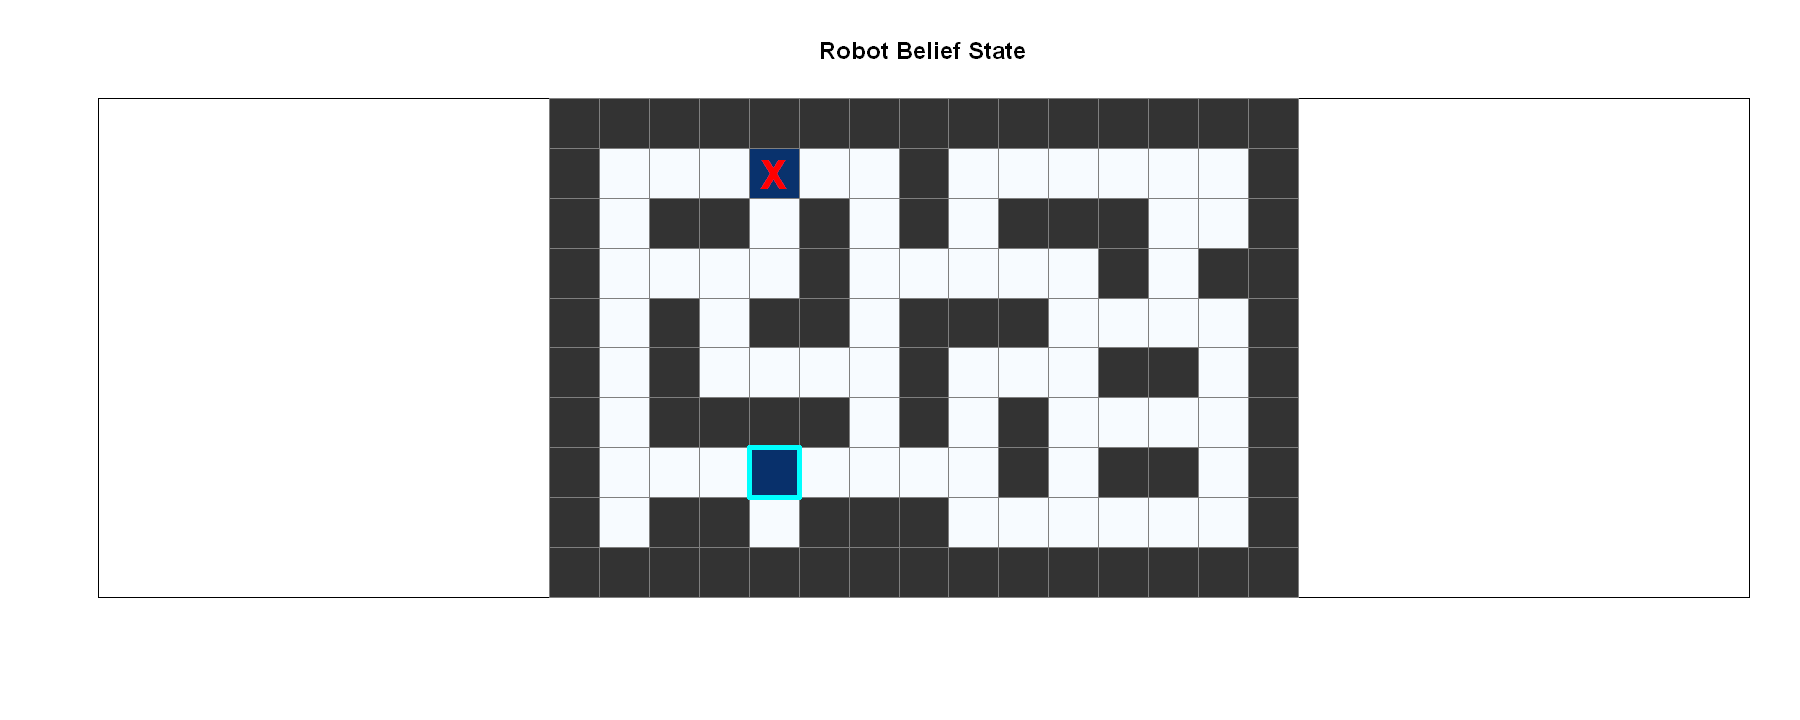

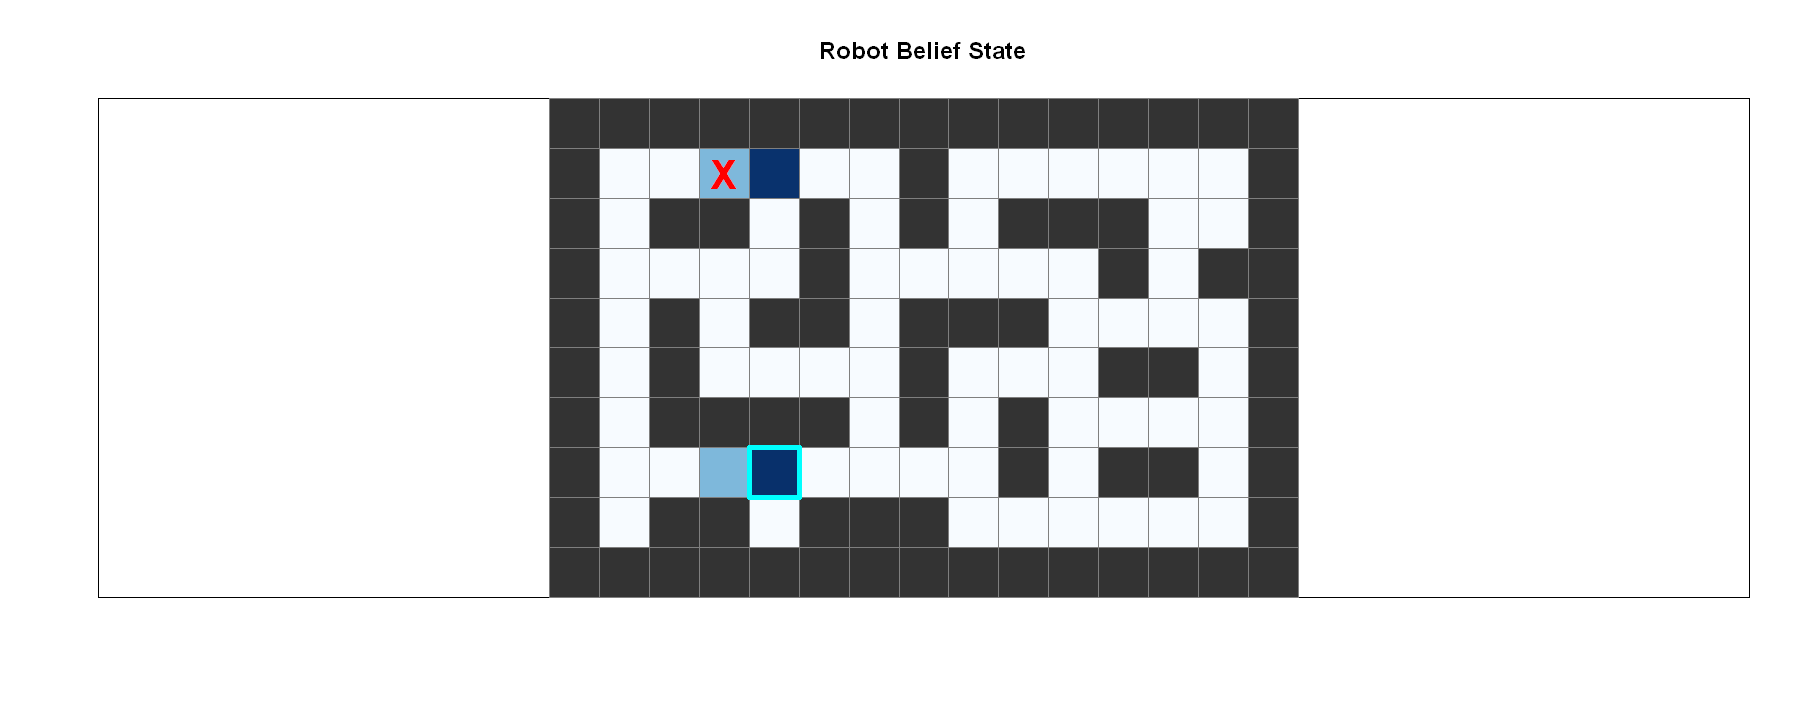

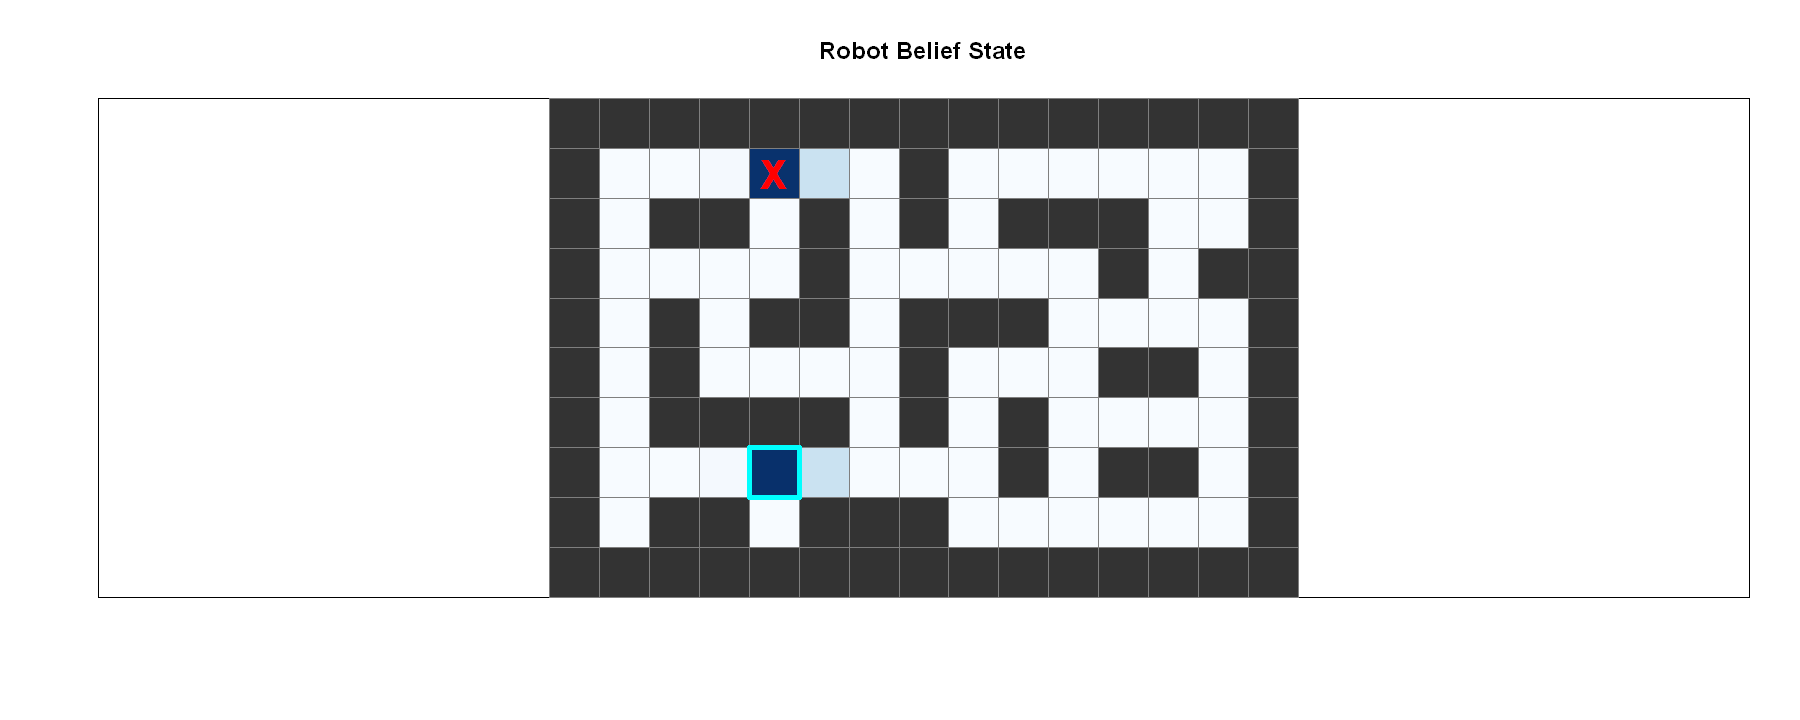

In [ ]:
for(i in 1:12) {
  plot_belief_map(map, beliefs[[i]], real_pos[[i]])
}

### 8. **TO-DO:** Evaluate the results 📈 (10 points🎯)
Pass the output of your model to the following functions. Function `plot_belief_maxima` plots our maximum likelihood belief versus state. Function `plot_belief_accuracy` prints the number of correct predictions in each group of 5 along with the overall accuracy.

In [ ]:
plot_belief_maxima <- function(beliefs) {
  if (!is.list(beliefs) || !all(sapply(beliefs, is.matrix))) {
    stop("Input must be a list of matrices.")
  }

    max_values <- sapply(beliefs, max)

  df <- data.frame(
    Index = seq_along(max_values),
    MaxValue = max_values
  )

  return(
    ggplot(df, aes(x = Index, y = MaxValue)) +
    geom_line(color = "blue", linewidth = 1) +
    geom_point(color = "red", size = 3) +
    labs(
      title = "Maximum Value of Each Belief Matrix",
      x = "Matrix Index",
      y = "Maximum Value"
    ) +
    theme_minimal()
  )
}


In [ ]:
plot_belief_accuracy <- function(beliefs, real_pos) {
  if (length(beliefs) != length(real_pos)) {
    stop("beliefs and real_pos must have the same length.")
  }

  predicted_pos <- lapply(beliefs, function(b) {
    idx <- which(b == max(b), arr.ind = TRUE)
    return(idx[1, ])
  })

  correct <- mapply(function(p, r) all(p == r), predicted_pos, real_pos)

  n <- length(correct)
  group_indices <- ceiling(seq_len(n) / 5)
  correct_counts <- tapply(correct, group_indices, sum)

  df <- data.frame(
    Group = factor(seq_along(correct_counts)),
    Correct = as.numeric(correct_counts)
  )

  overall_acc <- mean(correct)
  cat(sprintf("Overall accuracy: %.2f%%\n", 100 * overall_acc))

  return(
    ggplot(df, aes(x = Group, y = Correct)) +
    geom_col(fill = "steelblue") +
    labs(
      title = "Correct Predictions per 5 Belief Blocks",
      x = "Group of 5 Beliefs",
      y = "Number of Correct Predictions"
    ) +


    
    theme_minimal()
  )

}



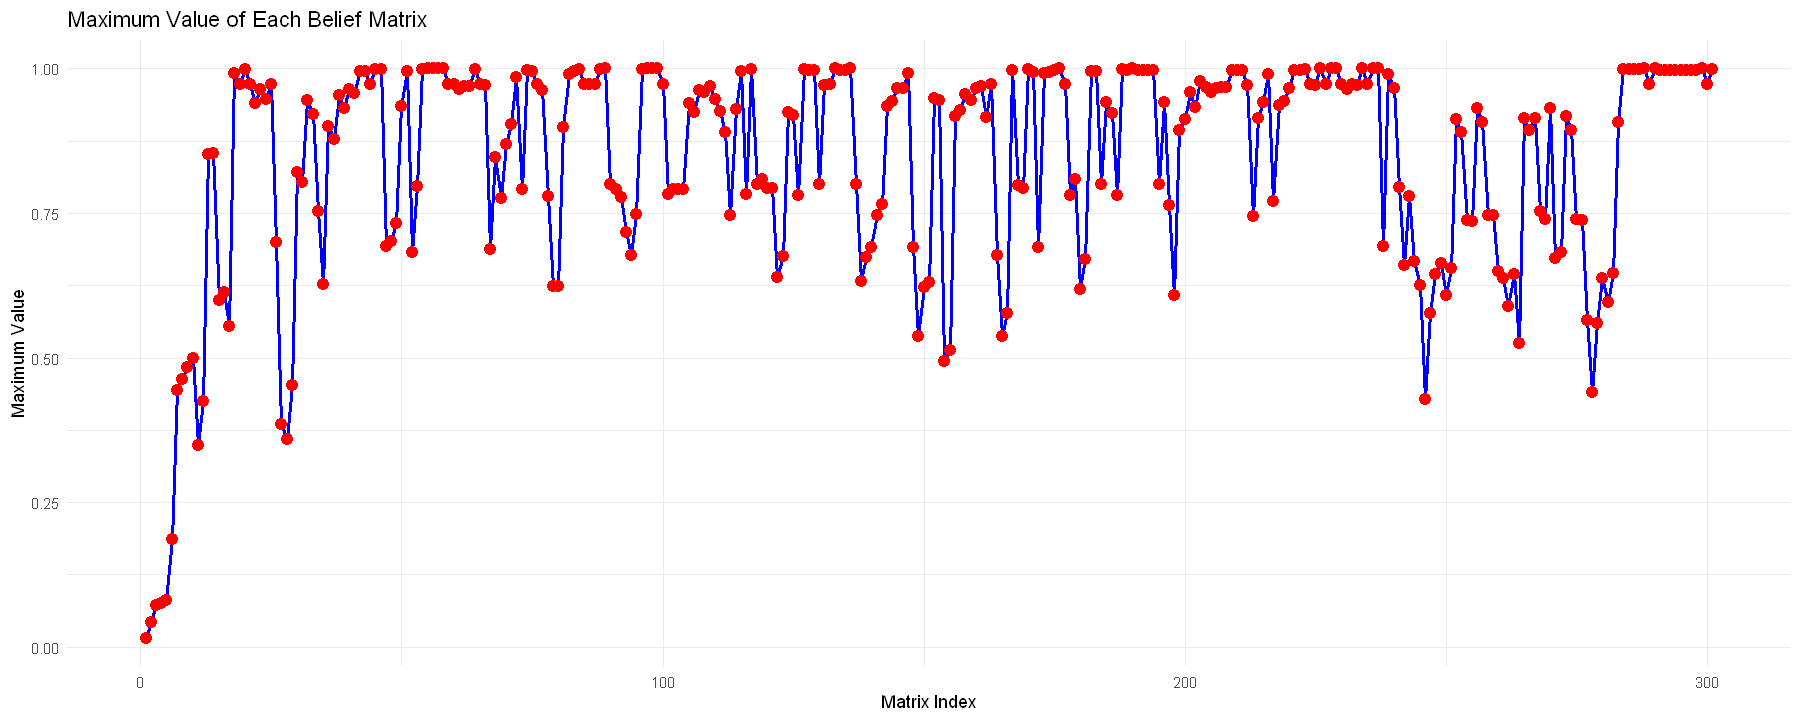

In [ ]:
plot_belief_maxima(beliefs)

Overall accuracy: 85.71%


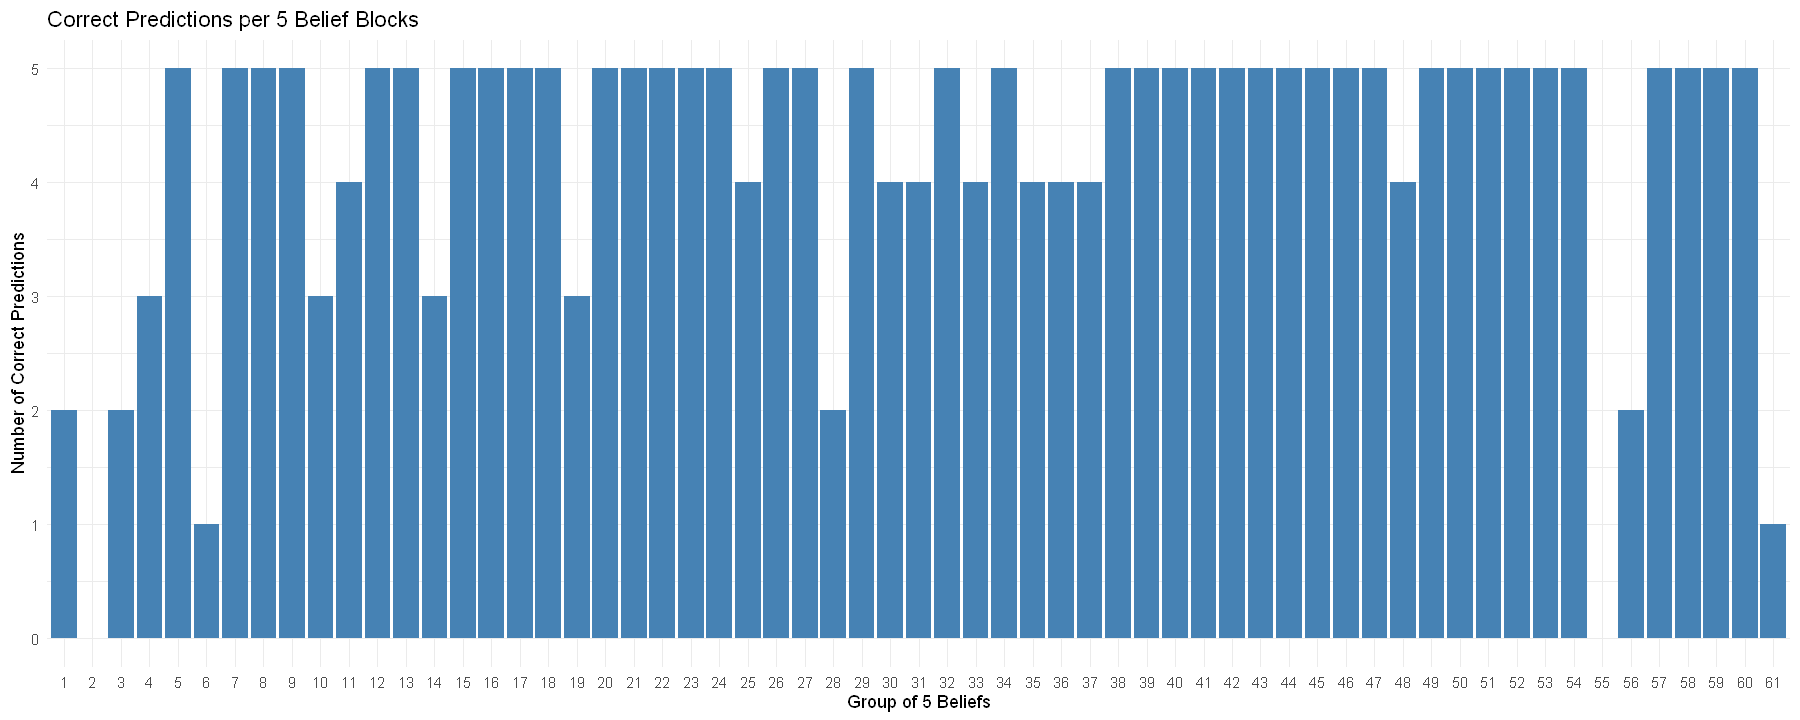

In [ ]:
plot_belief_accuracy(beliefs, real_pos)

8.1. Change the model error percentage according to the table below and compare the graphs for 300 moves.
+ At each step, change the `SENSOR_ERROR` and `MOVE_ERROR` values ​​and call the `model` function again and plot the model output with given functions.

| Sensor error | Movement Error |
| ------------ | -------------- |
| 0.01         | 0.01           |
| 0.05         | 0.05           |
| 0.6          | 0.6            |
| 0.6          | 0.001          |
| 0.001        | 0.6            |

+ **Note:** Don't use `for` and plot each graph in a **separate cell**.

8.2. Finally, analyze the results and check the reason for the behavior of each chart. Also, compare the importance of sensor error and movement error according to the results.

[1] "Testing with Errors: 0.01, 0.01"
Overall accuracy: 99.00%


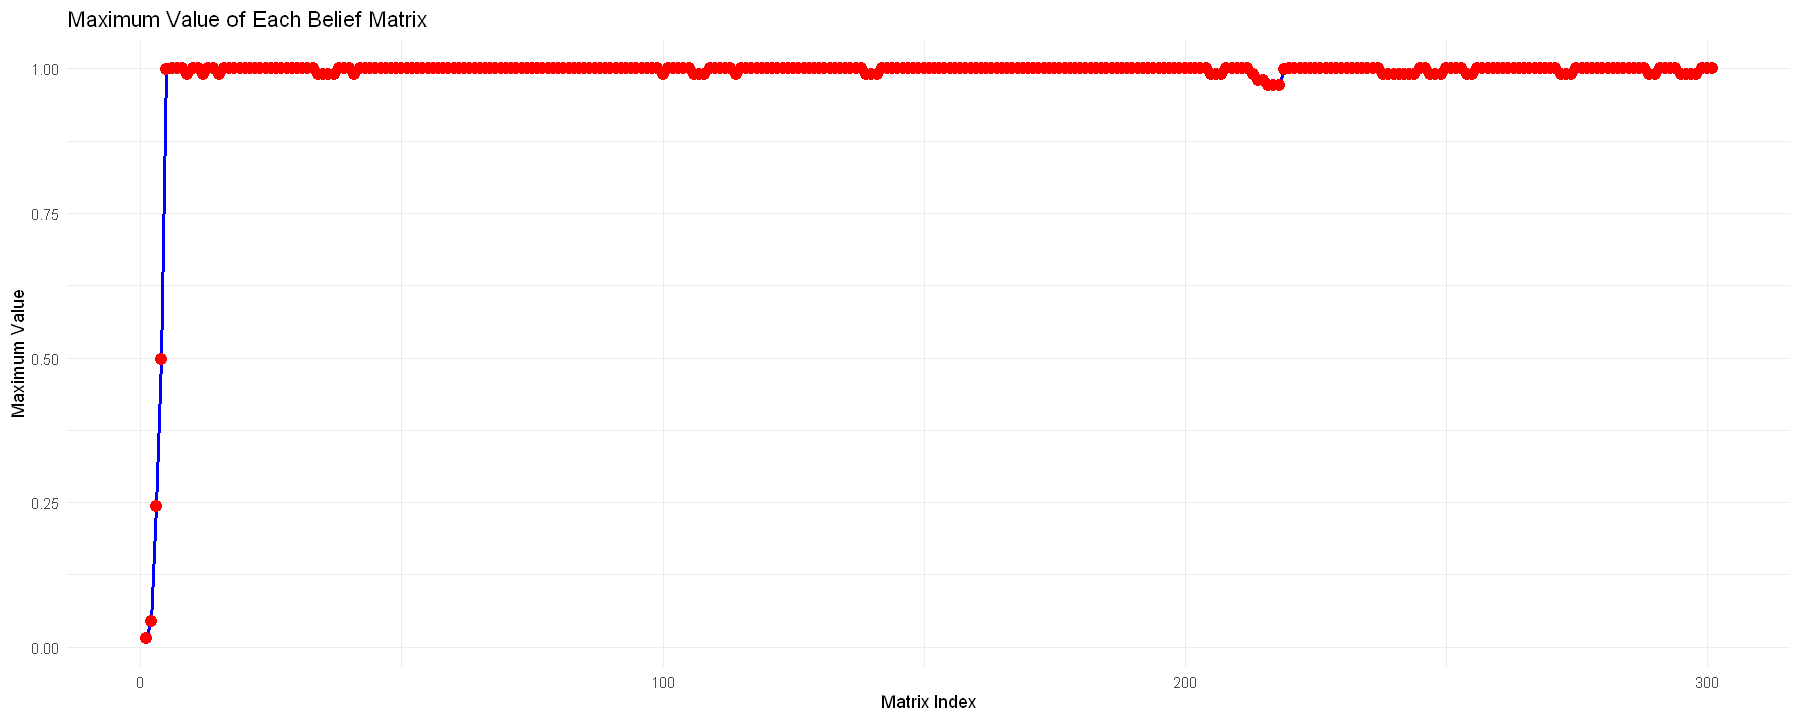

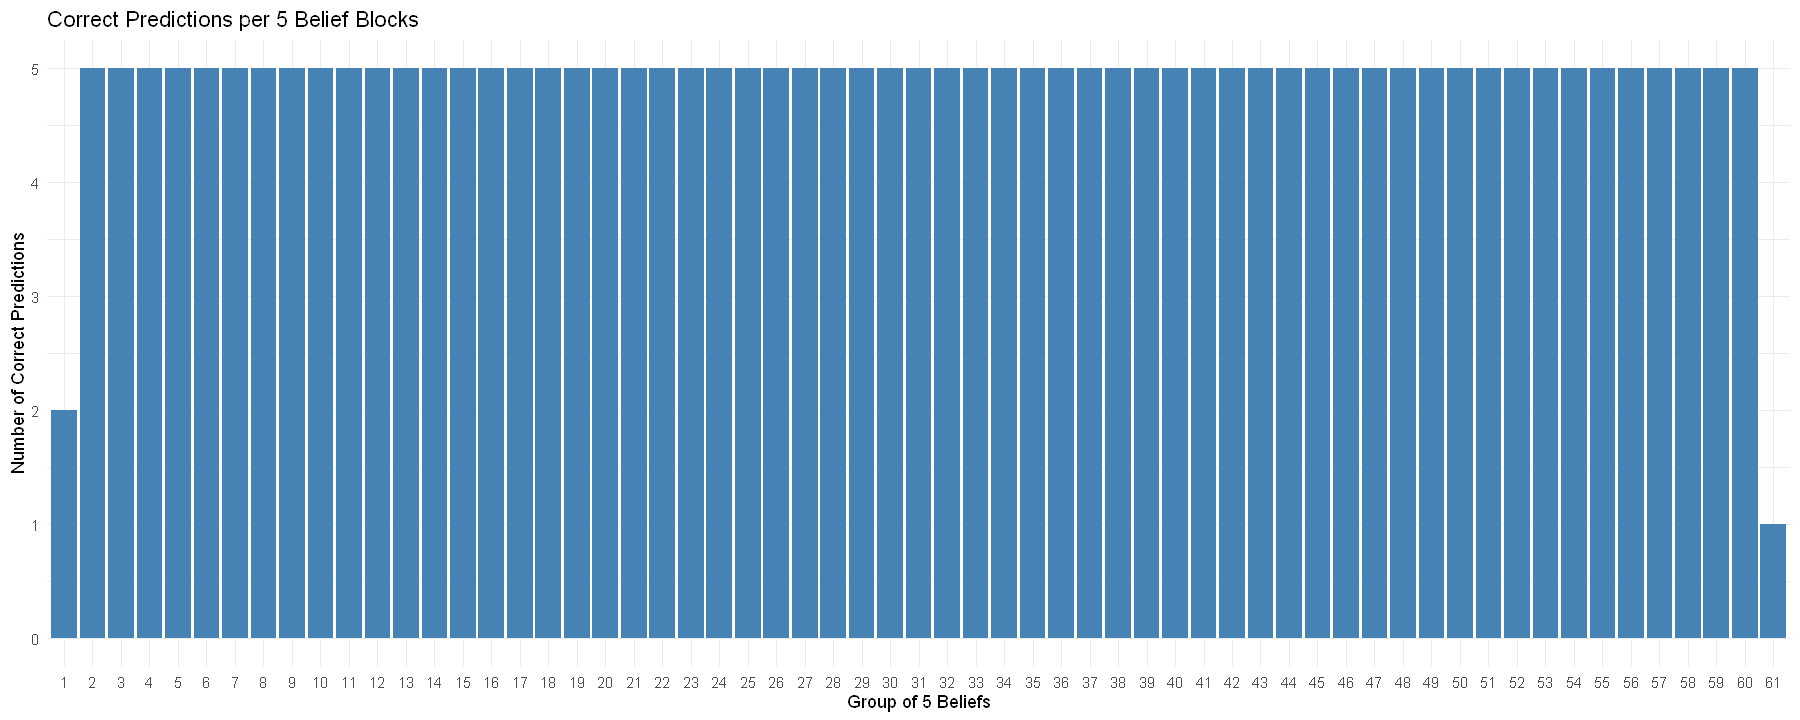

In [ ]:
# TO DO: {0.01, 0.01}
SENSOR_ERROR <<- 0.01
MOVE_ERROR <<- 0.01
chosen_dirs <- generate_directions(map, start_pos = INITIAL_POS, n = 300, valid_ratio = 0.9)
result <- model(map, chosen_dirs)
print("Testing with Errors: 0.01, 0.01")
plot_belief_maxima(result$beliefs)
plot_belief_accuracy(result$beliefs, result$real_pos)


[1] "Testing with Errors: 0.05, 0.05"
Overall accuracy: 95.68%


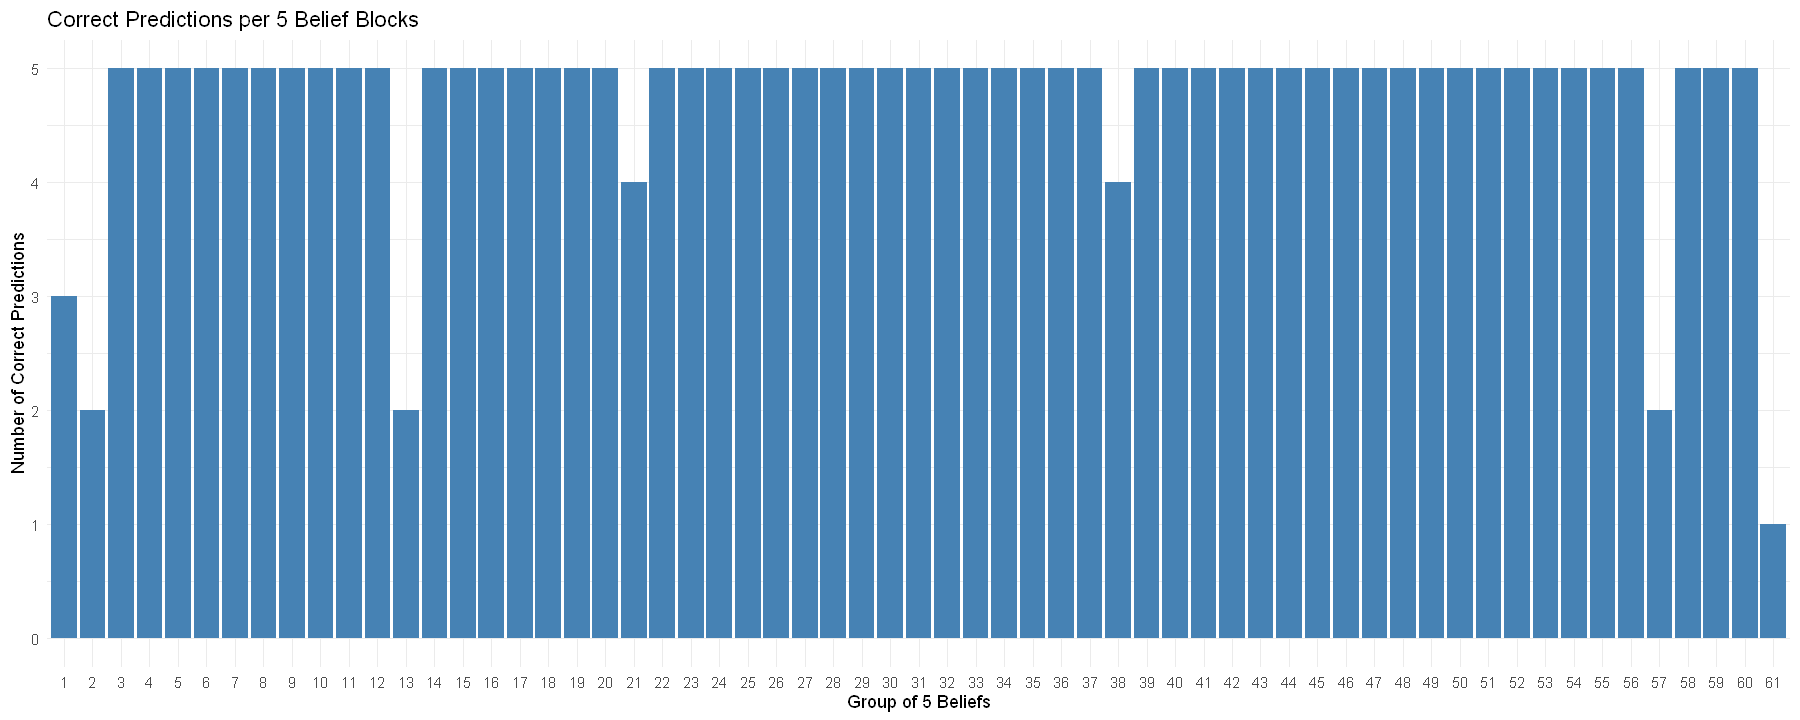

In [ ]:
# TO DO: {0.05, 0.05}
SENSOR_ERROR <<- 0.05
MOVE_ERROR <<- 0.05
chosen_dirs <- generate_directions(map, start_pos = INITIAL_POS, n = 300, valid_ratio = 0.9)
result <- model(map, chosen_dirs)
print("Testing with Errors: 0.05, 0.05")
plot_belief_accuracy(result$beliefs, result$real_pos)


[1] "Testing with Errors: 0.6, 0.6"
Overall accuracy: 1.66%


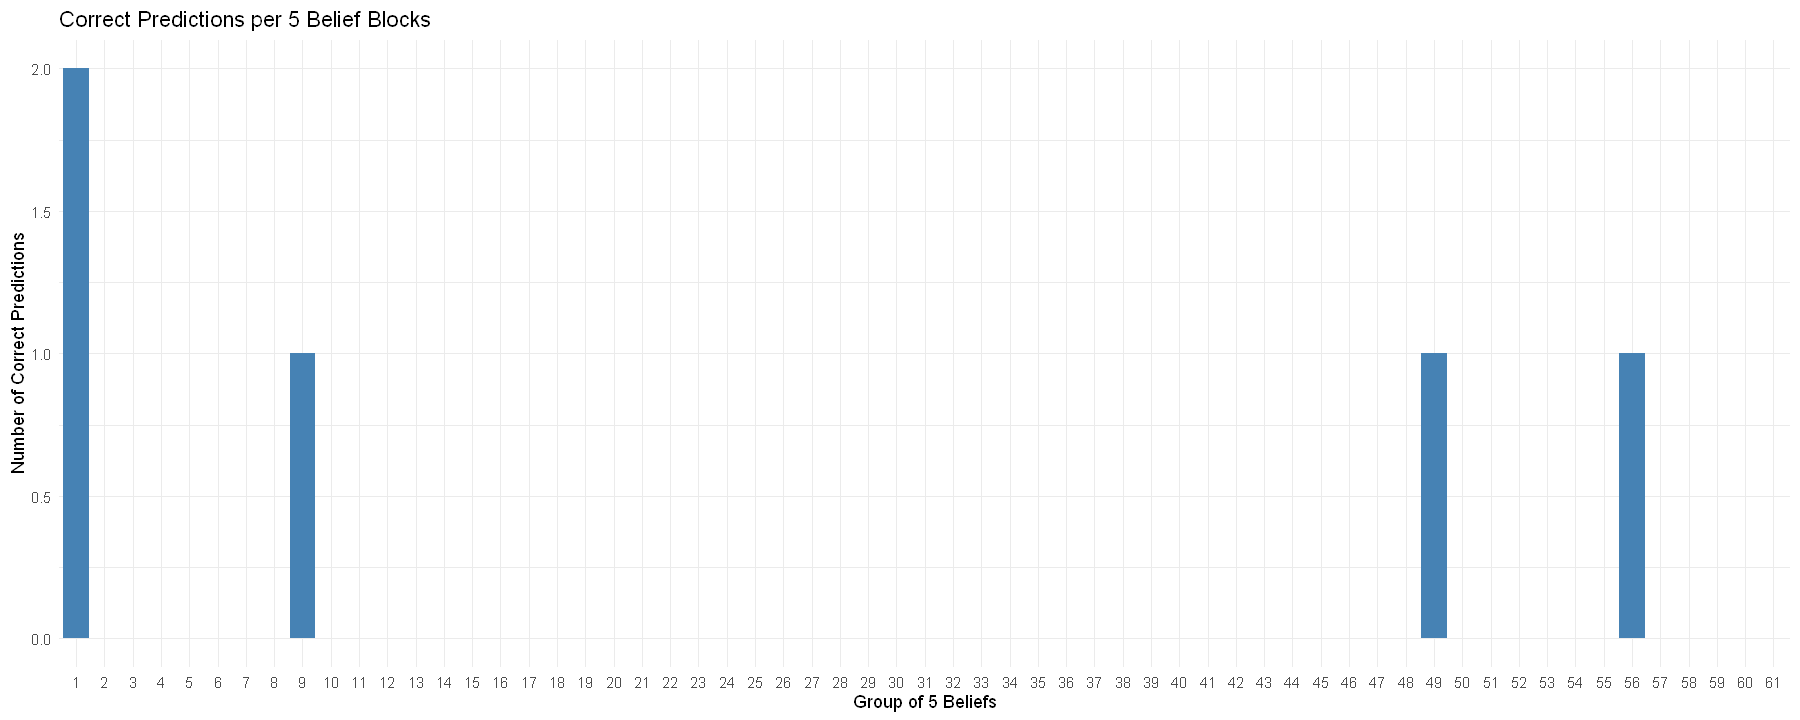

In [ ]:
# TO DO: {0.6, 0.6}
SENSOR_ERROR <<- 0.6
MOVE_ERROR <<- 0.6
chosen_dirs <- generate_directions(map, start_pos = INITIAL_POS, n = 300, valid_ratio = 0.9)
result <- model(map, chosen_dirs)
print("Testing with Errors: 0.6, 0.6")
plot_belief_accuracy(result$beliefs, result$real_pos)


[1] "Testing with Errors: 0.06, 0.001"
Overall accuracy: 96.01%


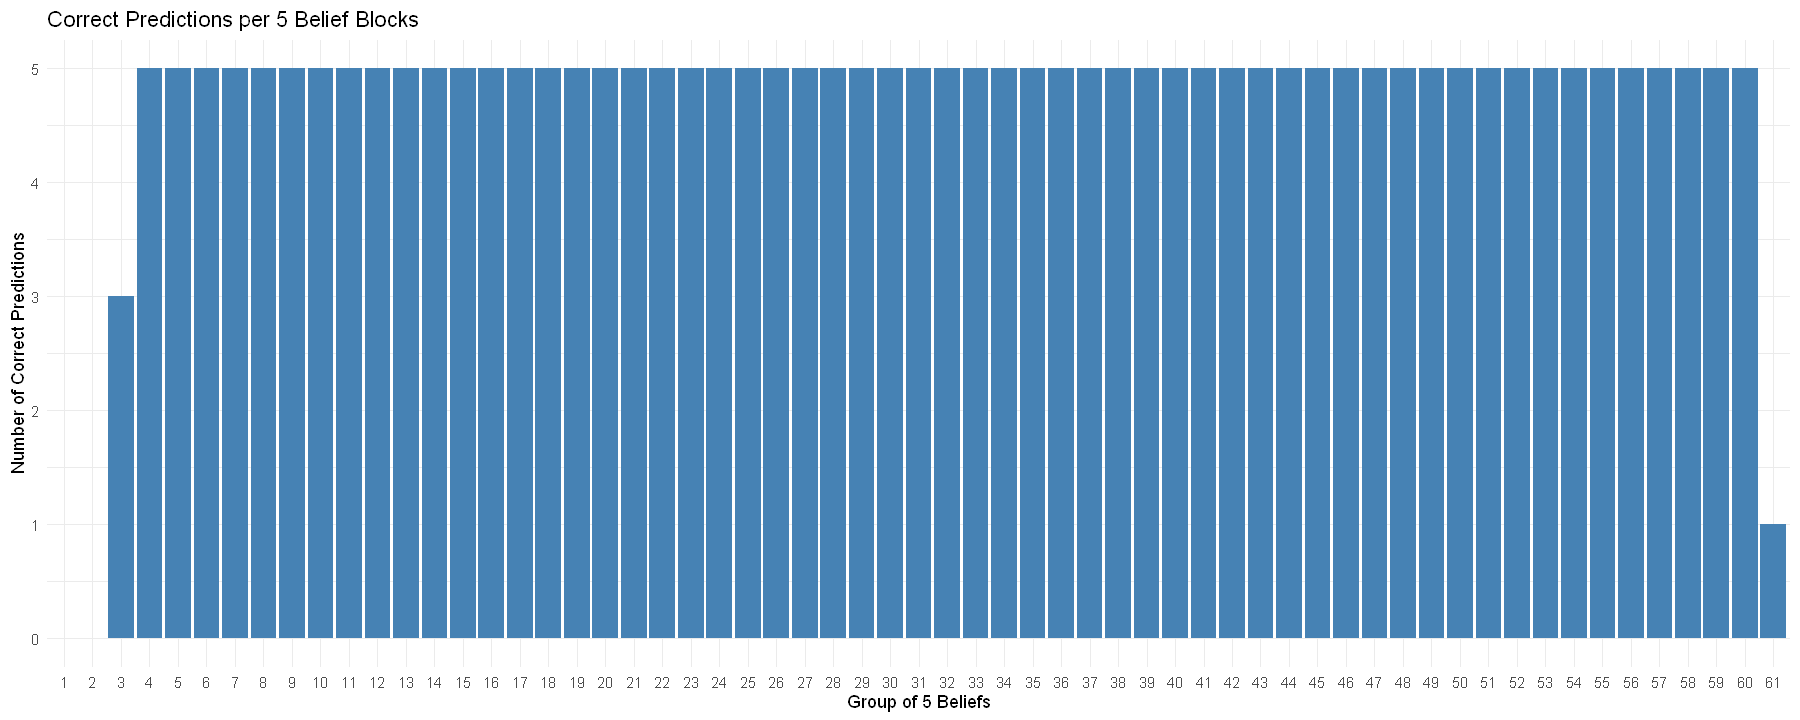

In [ ]:
# TO DO: {0.06, 0.001}
SENSOR_ERROR <<- 0.06
MOVE_ERROR <<- 0.001
chosen_dirs <- generate_directions(map, start_pos = INITIAL_POS, n = 300, valid_ratio = 0.9)
result <- model(map, chosen_dirs)
print("Testing with Errors: 0.06, 0.001")
plot_belief_accuracy(result$beliefs, result$real_pos)


[1] "Testing with Errors: 0.001, 0.06"
Overall accuracy: 97.67%


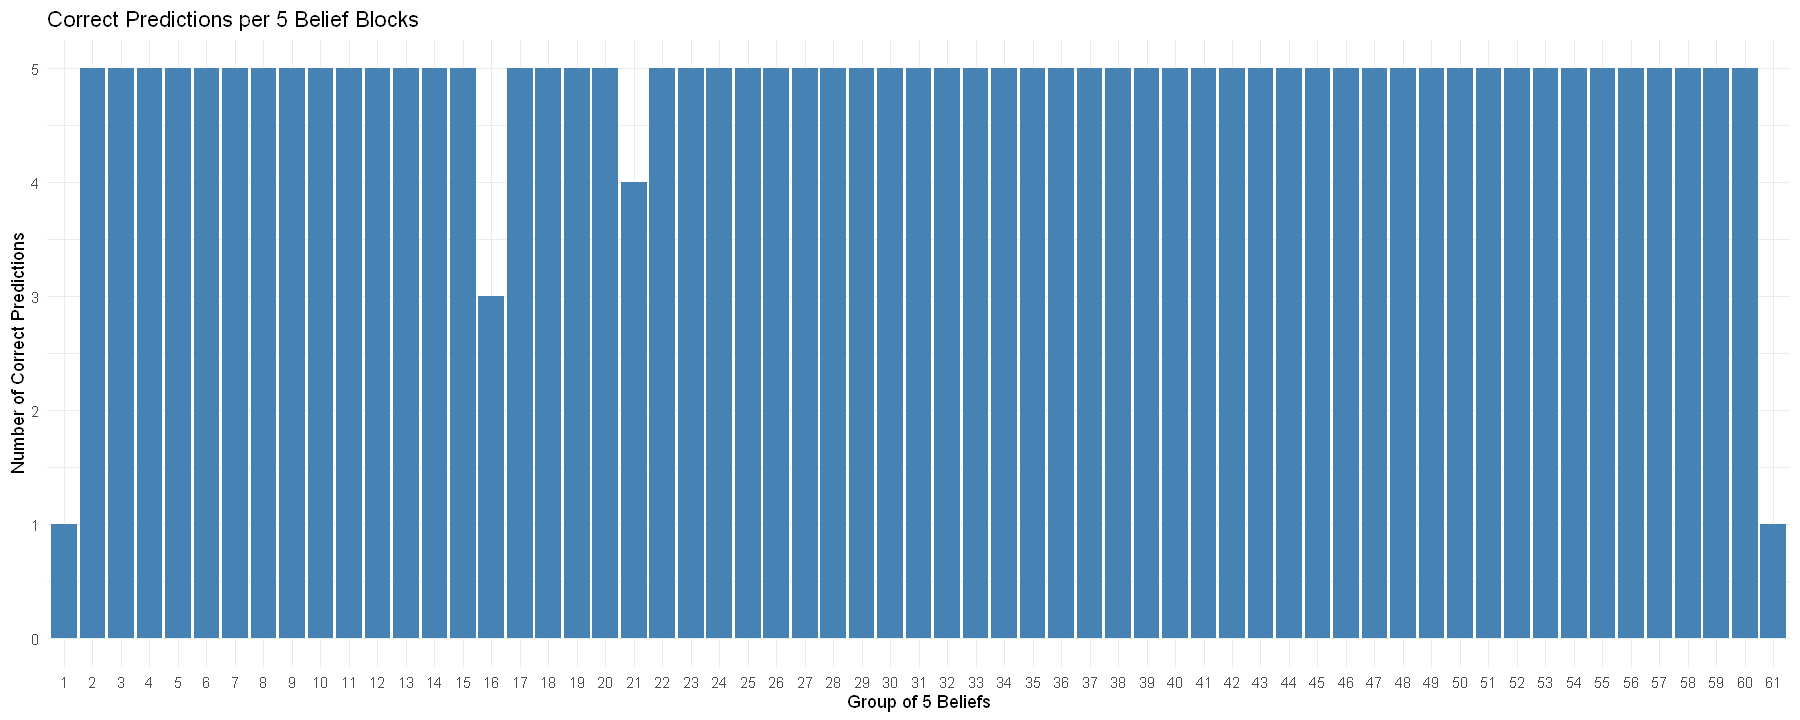

In [ ]:
# TO DO: {0.001, 0.06}
SENSOR_ERROR <<- 0.001
MOVE_ERROR <<- 0.06
chosen_dirs <- generate_directions(map, start_pos = INITIAL_POS, n = 300, valid_ratio = 0.9)
result <- model(map, chosen_dirs)
print("Testing with Errors: 0.001, 0.06")
plot_belief_accuracy(result$beliefs, result$real_pos)
